# Flight Delay EDA and Prediction
--- Assignment in the course Introduction to Data Science WiSe 2021 --


## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar

In [ ]:
# General settings 
pd.set_option('display.max_columns', None)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

In [2]:
# Read csv and sample data
raw_df = pd.read_csv("dataset.csv")
sampled_data = raw_df.sample(frac=0.95, random_state=436968)

In [3]:
# quick overview of dataset
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893603 entries, 98452 to 539812
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    893603 non-null  int64  
 1   Unnamed: 0.1                  893603 non-null  int64  
 2   YEAR                          893603 non-null  int64  
 3   MONTH                         893603 non-null  int64  
 4   DAY                           893603 non-null  int64  
 5   DAY_OF_WEEK                   893603 non-null  int64  
 6   AIRLINE                       893603 non-null  object 
 7   FLIGHT_NUMBER                 893603 non-null  int64  
 8   TAIL_NUMBER                   879653 non-null  object 
 9   ORIGIN_AIRPORT                893603 non-null  object 
 10  DESTINATION_AIRPORT           893603 non-null  object 
 11  SCHEDULED_DEPARTURE           893603 non-null  int64  
 12  DEPARTURE_TIME                811776 non

In [5]:
sampled_data.head()

,Unnamed: 0,Unnamed: 0.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY
98452,98452,436085,2015,9,8,2,UA,1493,N38459,EWR,LAX,1400,1415.0,15.0,10.0,1425.0,357.0,400.0,319.0,2454,1644.0,71.0,1657,1755.0,58.0,0,0,N,43.0,0.0,15.0,0.0,0.0,251,35,Afternoon
343488,343488,566135,2015,11,7,6,WN,524,N563WN,LAS,MSY,1640,1640.0,0.0,31.0,1711.0,195.0,219.0,180.0,1500,2211.0,8.0,2155,2219.0,24.0,0,0,N,24.0,0.0,0.0,0.0,0.0,311,44,Afternoon
631915,631915,903692,2015,6,22,1,WN,741,N619SW,TPA,FLL,1755,1825.0,30.0,10.0,1835.0,60.0,53.0,38.0,197,1913.0,5.0,1855,1918.0,23.0,0,0,N,0.0,0.0,15.0,8.0,0.0,173,24,Afternoon
536916,536916,343675,2015,8,7,5,EV,4988,N153PQ,MSP,BDL,658,658.0,0.0,31.0,729.0,153.0,171.0,133.0,1050,1042.0,7.0,1031,1049.0,18.0,0,0,N,18.0,0.0,0.0,0.0,0.0,219,31,Morning
387727,387727,111303,2015,11,23,1,MQ,3429,N669MQ,CMI,ORD,733,1012.0,159.0,10.0,1022.0,90.0,57.0,37.0,135,1059.0,10.0,903,1109.0,126.0,0,0,N,0.0,0.0,126.0,0.0,0.0,327,46,Morning


## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled. Explain the difference.

In [6]:
# find unique cancelation reasons
cancelation_reason = sampled_data['CANCELLATION_REASON']
unique_cancel_reasons = cancelation_reason.unique()
print("The unique cancelation reasons are:")
print(unique_cancel_reasons)

# subset df to cancelled flights
canceled_flights = sampled_data[sampled_data['CANCELLED'] == 1]
canceled_flights_reasons = canceled_flights['CANCELLATION_REASON'].unique()
print("The unique cancelation reasons of flights that have been canceled are:")
print(canceled_flights_reasons)

# subset df to not cancelled flights
not_canceled_flights = sampled_data[sampled_data['CANCELLED'] == 0]
not_canceled_flights_reasons = not_canceled_flights['CANCELLATION_REASON'].unique()
print("The unique cancelation value of flights that have not been canceled is:")
print(not_canceled_flights_reasons)

The unique cancelation reasons are:
['N' 'B' 'A' 'C' 'D']
The unique cancelation reasons of flights that have been canceled are:
['B' 'A' 'C' 'D']
The unique cancelation value of flights that have not been canceled is:
['N']


There are 5 different values for the cancelation reason. Considering the flights that have not been canceled, the only possible value is 'N' which probably is a shortcut for "not canceled". If the flight has been canceled, there are 4 different values 'A' to 'D' corresponding to a reason for cancelation.

#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [7]:
# drop rows with null values
no_null_data = sampled_data.dropna()
print(f"Removed {len(sampled_data) - len(no_null_data)} rows with null values")

# find unique cancelation reasons
cancelation_reasons = no_null_data['CANCELLATION_REASON'].unique()
print("The unique cancelation reason in the dataset without null values is:")
print(cancelation_reasons)

Removed 85374 rows with null values
The unique cancelation reason in the dataset without null values is:
['N']


There is only one possible value for the cancelation reason column in the dataset without null values, namely 'N'. As mentioned before, the 'N' value probably represents that the flight has not been canceled. The reason why this is the only value for cancelation reason is that flights that have been canceled contain null values. For example the column 'ARRIVAL_TIME' is a null value because the flight has never arrived if it got canceled.    

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

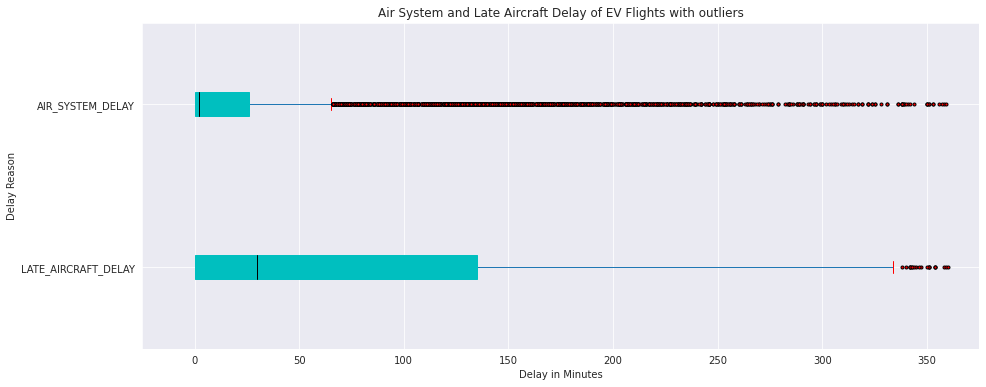

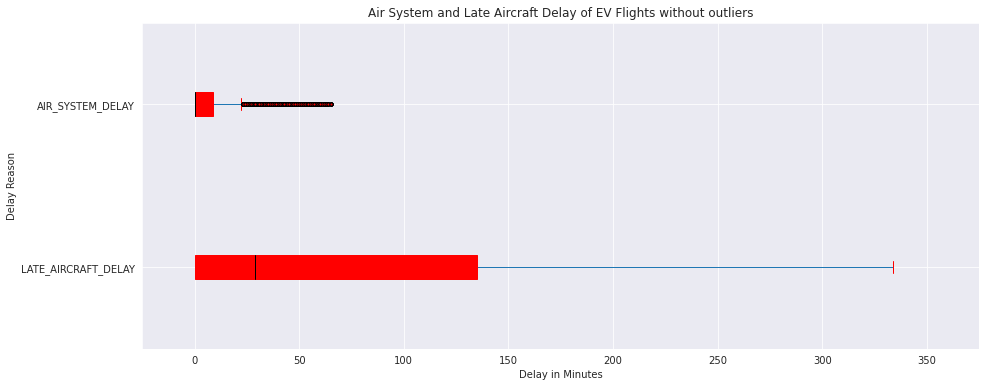

In [8]:
# filter ev flights and arrival delay limits
ev_flights = no_null_data[no_null_data['AIRLINE'] == 'EV']
min_delay = 120
max_delay = 360
ev_data = ev_flights[(ev_flights['ARRIVAL_DELAY'] >= min_delay) & (ev_flights['ARRIVAL_DELAY'] <= max_delay)]

sns.set_style("darkgrid")
# boxplot of attributes
color = dict(boxes='c', medians='k', caps='r')
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
red_square = dict(markerfacecolor='r', marker='.')
ax = ev_data.boxplot(column=['LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY'], color=color, flierprops=red_square, grid=True,
                     patch_artist=True, vert=False)
ax.set_title('Air System and Late Aircraft Delay of EV Flights with outliers')
ax.set_ylabel('Delay Reason')
ax.set_xlabel('Delay in Minutes')
ax.set_xlim(-25, 375)
ax.xaxis.set_ticks(np.arange(0, 375, 50))
plt.show()

# compute quantiles of datasets and find outlier bounds
q1_aircraft_delay = ev_data['LATE_AIRCRAFT_DELAY'].quantile(0.25)
q3_aircraft_delay = ev_data['LATE_AIRCRAFT_DELAY'].quantile(0.75)
iqr_aircraft_delay = q3_aircraft_delay - q1_aircraft_delay
lower_outlier_aircraft_delay = q1_aircraft_delay - 1.5 * iqr_aircraft_delay
upper_outlier_aircraft_delay = q3_aircraft_delay + 1.5 * iqr_aircraft_delay

q1_system_delay = ev_data['AIR_SYSTEM_DELAY'].quantile(0.25)
q3_system_delay = ev_data['AIR_SYSTEM_DELAY'].quantile(0.75)
iqr_system_delay = q3_system_delay - q1_system_delay
lower_outlier_system_delay = q1_system_delay - 1.5 * iqr_system_delay
upper_outlier_system_delay = q3_system_delay + 1.5 * iqr_system_delay

# filter datasets by outliers
cleaned_data_late_aircraft = ev_data[(ev_data['LATE_AIRCRAFT_DELAY'] >= lower_outlier_aircraft_delay) & (
            ev_data['LATE_AIRCRAFT_DELAY'] <= upper_outlier_aircraft_delay)]
cleaned_data_air_system = ev_data[(ev_data['AIR_SYSTEM_DELAY'] >= lower_outlier_system_delay) & (
            ev_data['AIR_SYSTEM_DELAY'] <= upper_outlier_system_delay)]

# boxplot of ev delay without outliers
color = dict(boxes='r', medians='k', caps='r')
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
concat_df = pd.concat(
    [cleaned_data_late_aircraft[['LATE_AIRCRAFT_DELAY']], cleaned_data_air_system[['AIR_SYSTEM_DELAY']]])
ax = concat_df.boxplot(column=['LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY'], color=color, flierprops=red_square,
                       grid=True, patch_artist=True, vert=False)
ax.set_title('Air System and Late Aircraft Delay of EV Flights without outliers')
ax.set_xlabel('Delay in Minutes')
ax.set_ylabel('Delay Reason')
ax.set_xlim(-25, 375)
ax.xaxis.set_ticks(np.arange(0, 375, 50))
plt.show()


#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [9]:
num_late_aircraft_delay = len(ev_data[ev_data['LATE_AIRCRAFT_DELAY'] > 0])
num_air_system_delay = len(ev_data[ev_data['AIR_SYSTEM_DELAY'] > 0])
num_air_system_delay_high = len(ev_data[ev_data['AIR_SYSTEM_DELAY'] >= upper_outlier_aircraft_delay])
num_delays = len(ev_data[ev_data['ARRIVAL_DELAY'] > 0])

outliers_aircraft_delay = num_delays - len(cleaned_data_late_aircraft)
outliers_air_system = num_delays - len(cleaned_data_air_system)

print("There are " + str(num_delays) + " delays in the original dataset.")
print("There are " + str(num_late_aircraft_delay) + " late aircraft delays in the original dataset.")
print("In the cleaned_data_late_aircraft dataset, " + str(outliers_aircraft_delay) + " outliers (delay >= " + str(
    upper_outlier_aircraft_delay) + ") were removed.")
print("There are " + str(num_air_system_delay) + " air system delays in the original dataset.")
print("In the cleaned_data_air_system dataset, " + str(outliers_air_system) + " outliers (delay >= " + str(
    upper_outlier_system_delay) + ") were removed.")
print(str(num_air_system_delay_high) + " of these outliers had an air system delay >= " + str(
    upper_outlier_aircraft_delay) + " minutes.")

There are 10291 delays in the original dataset.
There are 6113 late aircraft delays in the original dataset.
In the cleaned_data_late_aircraft dataset, 21 outliers (delay >= 337.5) were removed.
There are 5426 air system delays in the original dataset.
In the cleaned_data_air_system dataset, 1691 outliers (delay >= 65.0) were removed.
21 of these outliers had an air system delay >= 337.5 minutes.


In [10]:
# subset arrival delay of ev flights
ev_data_arrival_delay = ev_data['ARRIVAL_DELAY']
cleaned_data_late_aircraft_delay = cleaned_data_late_aircraft['ARRIVAL_DELAY']
cleaned_data_air_system_delay = cleaned_data_air_system['ARRIVAL_DELAY']


# print basic statistics of dataframe
def print_statistics(df):
    print("Median: " + str(df.median()))
    print("Mean: " + str(df.mean()))
    print("Mode: " + str(df.mode()[0]))
    print("Standard deviation: " + str(df.std()))
    print("Variance: " + str(df.var()) + "\n")


print("Statistical features of arrival delay in dataset ev_data:")
print_statistics(ev_data_arrival_delay)

print("Statistical features of arrival delay in dataset cleaned_data_late_aircraft:")
print_statistics(cleaned_data_late_aircraft_delay)

print("Statistical features of arrival delay in dataset cleaned_data_air_system:")
print_statistics(cleaned_data_air_system_delay)

Statistical features of arrival delay in dataset ev_data:
Median: 165.0
Mean: 181.82897677582355
Mode: 121.0
Standard deviation: 55.23771141004822
Variance: 3051.2047618197716

Statistical features of arrival delay in dataset cleaned_data_late_aircraft:
Median: 165.0
Mean: 181.4851022395326
Mode: 121.0
Standard deviation: 54.76677169045795
Variance: 2999.3992813947466

Statistical features of arrival delay in dataset cleaned_data_air_system:
Median: 164.0
Mean: 181.3267441860465
Mode: 123.0
Standard deviation: 55.21853511640858
Variance: 3049.0866204020476



The dataset ev_data contains all outliers at which the arrival delay is extraordinary high. Therefore, the mean arrival delay as well as the standard deviation and variance take the highest values. 
As mentioned above, in the cleaned_data_late_aircraft dataset 21 outliers with significantly high late aircraft delays were removed. Since these outliers have a delay more than twice as great as the mean value, the removement leads to a lower variance than in the original dataset. The standard deviation is lowered as well. 
On the other side, the statistical features of the arrival delay in the cleaned_data_air_system dataframe are relatively similar to those of the original dataframe. In fact, the same number of outliers with extremely high delays were removed in this dataset (21). The difference is as follows: There are a lot of instances that were considered as outliers concerning air system delays even though their delay was less than the mean arrival delay in the original dataset. Therefore, the mean and median have not significantly changed in the cleaned_data_air_system dataframe compared to ev_data. The mode value is actually a little higher than in the original dataframe.
    

### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

   MONTH  ARRIVAL_DELAY
0    Jan      56.506226
1    Feb      59.143205
2    Mar      56.797079
3    Apr      56.152481
4    May      60.514689
5    Jun      63.689753
6    Jul      59.494535
7    Aug      59.750621
8    Sep      54.941824
9    Oct      55.115675
10   Nov      57.491801
11   Dec      62.750597


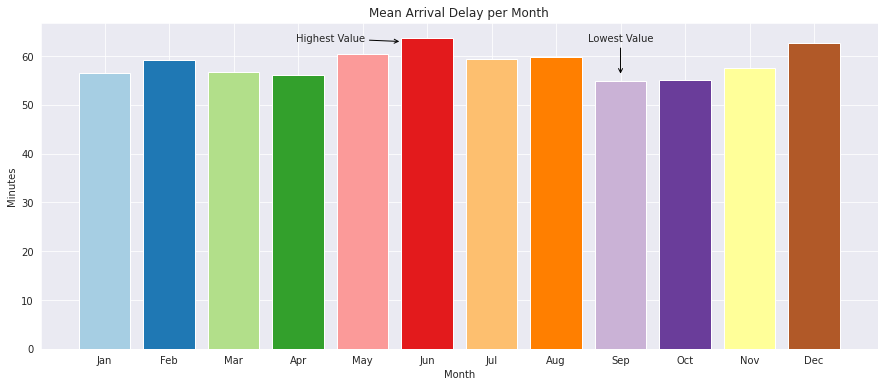

In [11]:
# group by month and calculate mean delay
df_month_group = no_null_data.groupby('MONTH', as_index=False)
df_month_group_mean_delay = df_month_group['ARRIVAL_DELAY'].mean()
# convert numerical month to month name
df_month_group_mean_delay['MONTH'] = df_month_group_mean_delay['MONTH'].apply(lambda x: calendar.month_abbr[x])
print(df_month_group_mean_delay)

# barplot of mean arrival delay per month
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.bar(df_month_group_mean_delay['MONTH'], df_month_group_mean_delay['ARRIVAL_DELAY'],
        color=plt.cm.Paired(np.arange(len(df_month_group_mean_delay))))
ax.set_title('Mean Arrival Delay per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Minutes')
# add annotations
ax.annotate('Lowest Value', xy=(8, 56), xytext=(8, 63), horizontalalignment="center",
            arrowprops=dict(arrowstyle='->', lw=1, color='black'))
ax.annotate('Highest Value', xy=(4.6, 63), xytext=(3.5, 63), horizontalalignment="center",
            arrowprops=dict(arrowstyle='->', lw=1, color='black'))
plt.show()

If you would like to avoid delay the best month for booking a flight is September, followed by October. The worst months are June and December.

#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

   MONTH  WEATHER_DELAY
0    Jan       2.746036
1    Feb       4.300125
2    Mar       2.401029
3    Apr       2.749245
4    May       3.740606
5    Jun       3.317139
6    Jul       2.142183
7    Aug       2.814746
8    Sep       2.315662
9    Oct       1.803216
10   Nov       2.692222
11   Dec       3.361606
Mean weather delay across all months: 2.87 minutes


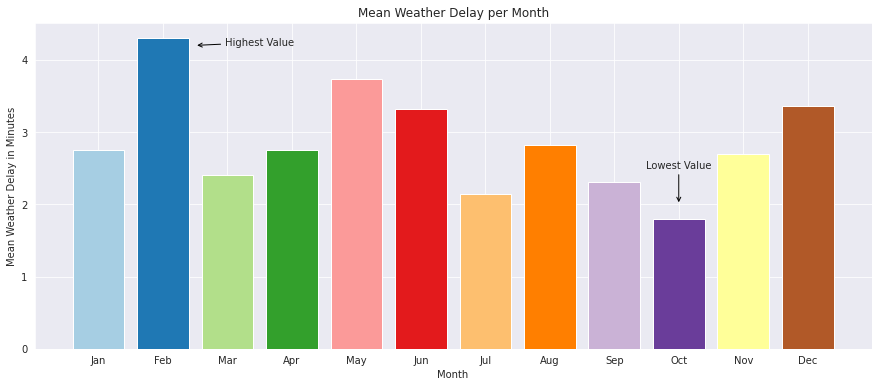

In [12]:
# calculate mean weather delay of monthly dataset
df_month_group_mean_weather_delay = df_month_group['WEATHER_DELAY'].mean()
# convert numerical month to month name
df_month_group_mean_weather_delay['MONTH'] = df_month_group_mean_weather_delay['MONTH'].apply(
    lambda x: calendar.month_abbr[x])
print(df_month_group_mean_weather_delay)
print("Mean weather delay across all months: " + str(
    np.round(df_month_group_mean_weather_delay['WEATHER_DELAY'].mean(), 2)) + " minutes")

# Barplot of mean weather delay per month
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.bar(df_month_group_mean_weather_delay['MONTH'], df_month_group_mean_weather_delay['WEATHER_DELAY'],
        color=plt.cm.Paired(np.arange(len(df_month_group_mean_delay))))
ax.set_title('Mean Weather Delay per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Mean Weather Delay in Minutes')
# add annotations
plt.annotate('Lowest Value', xy=(9, 2), xytext=(9, 2.5), horizontalalignment="center",
             arrowprops=dict(arrowstyle='->', lw=1, color='black'))
plt.annotate('Highest Value', xy=(1.5, 4.2), xytext=(2.5, 4.2), horizontalalignment="center",
             arrowprops=dict(arrowstyle='->', lw=1, color='black'))
plt.show()

In February, the mean weather delay takes the highest value, whereas in October the mean weather delay is the lowest.

#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

In October, the mean arrival delay has the second lowest value and the mean weather delay is the lowest value overall. June has the highest mean arrival delay, yet the mean weather delay is ranked on the fourth place. Presumably, the weather conditions in summer are better than in winter; this assumption is supported by the observation that the highest mean weather delay value is measured in February. Moreover, from November to January (winter) the mean weather delay is striking as well. In December, the mean arrival and mean weather delay is above the average values, underlining the positive correlation between mean arrival delay and mean weather delay.
In the following, the reasons for delay in June and February are explored in more detail.

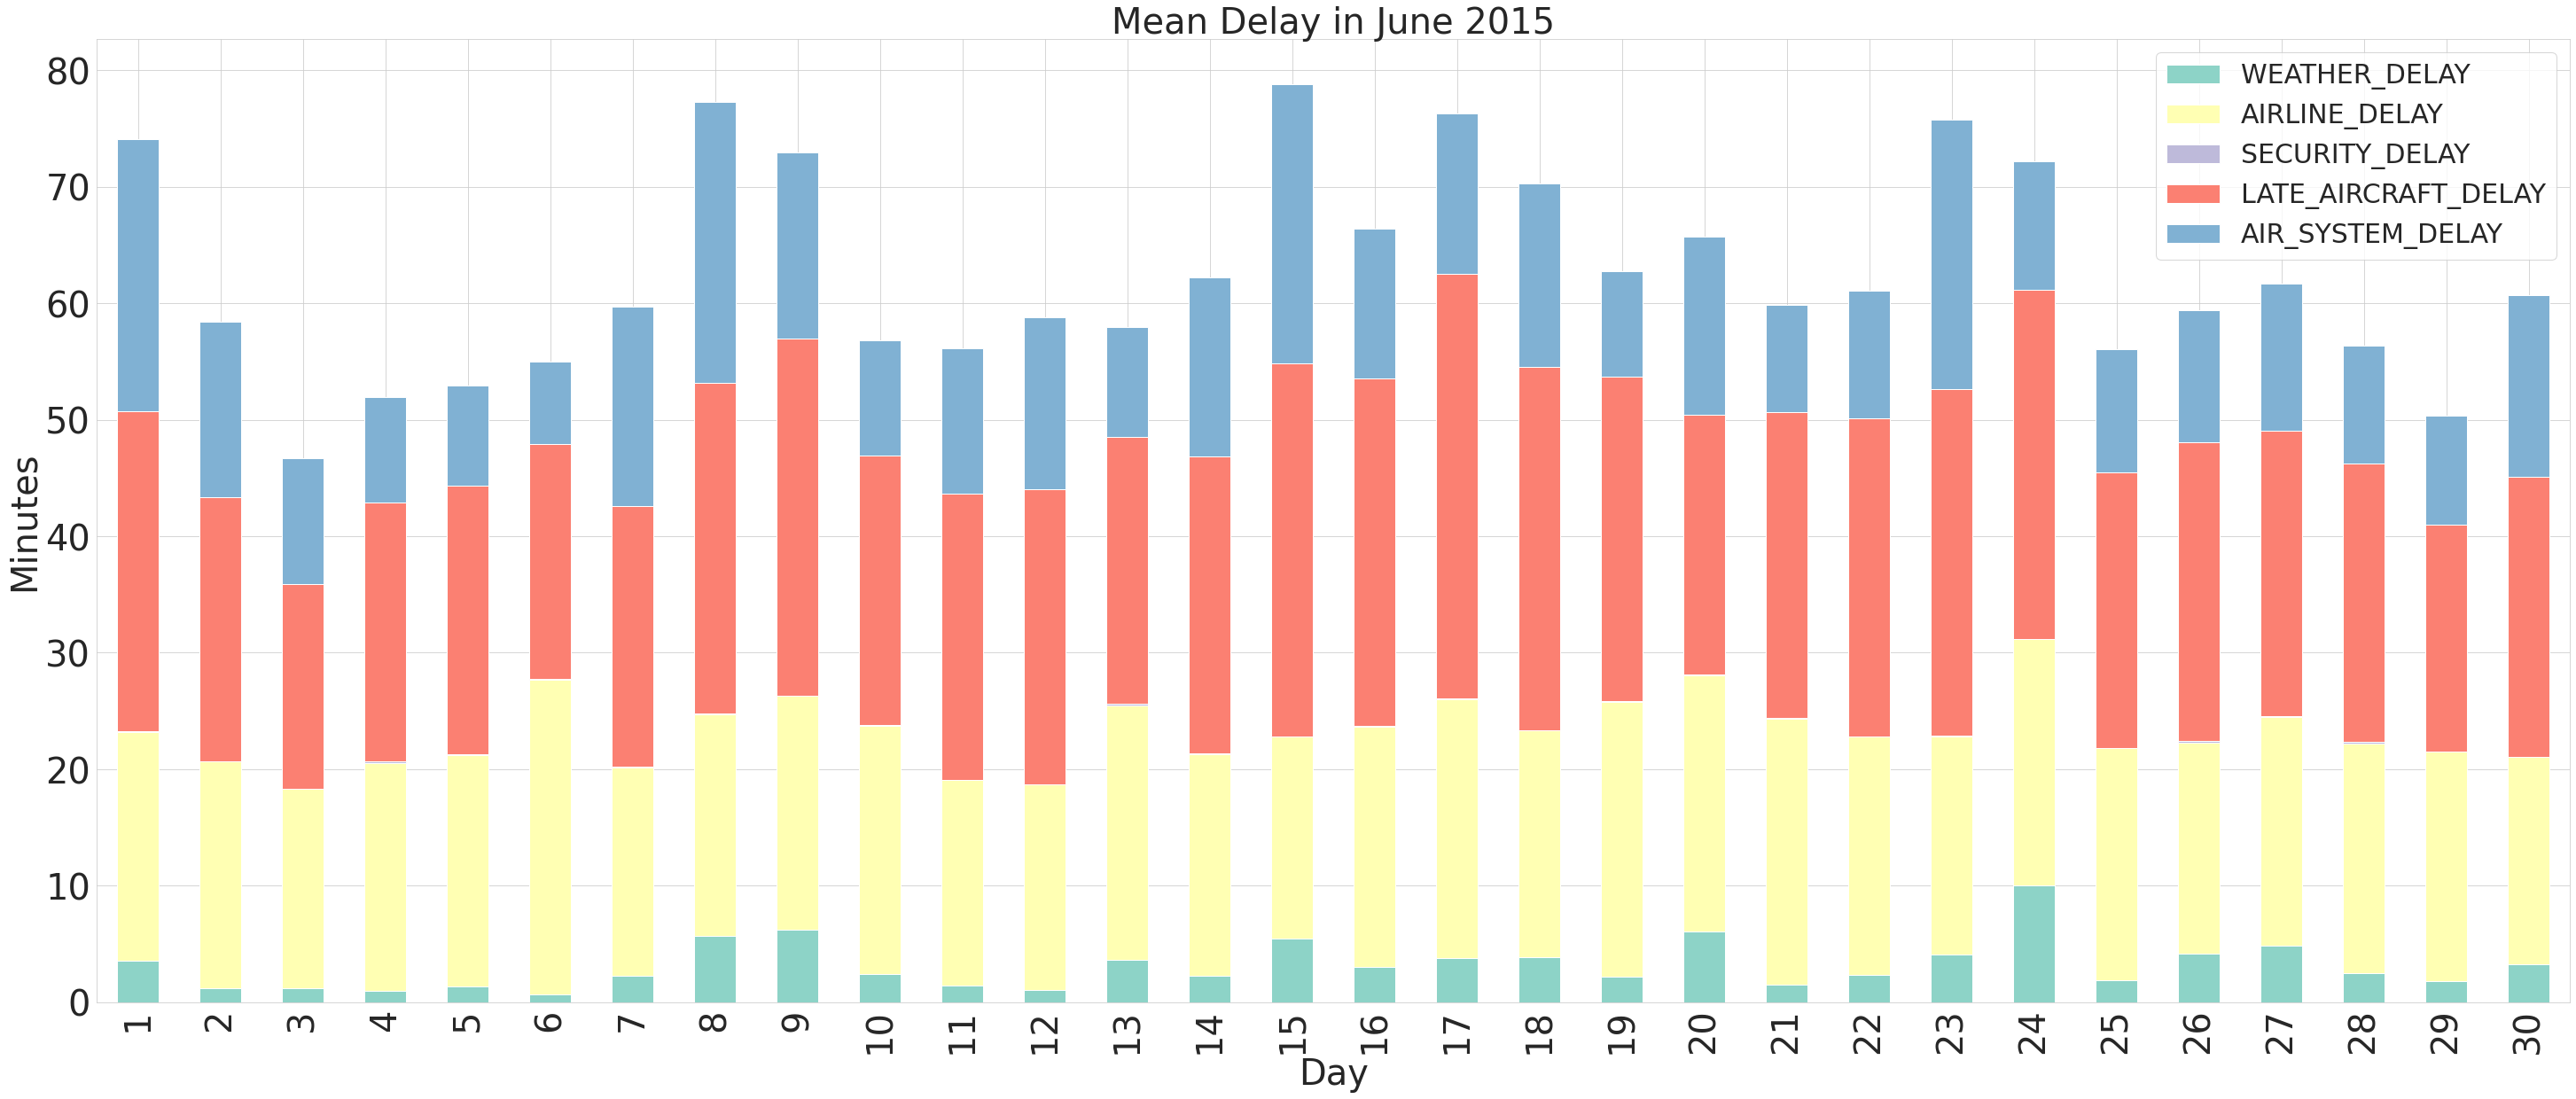

In [13]:
#filter no_null_data for month June
daily_delays_june = no_null_data[no_null_data['MONTH'] == 6]
daily_delays_june = daily_delays_june[
    ['DAY_YEARLY', 'WEATHER_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
     'AIR_SYSTEM_DELAY']].groupby("DAY_YEARLY").mean()
#change index from day yearly (0,365) to (1,30)
daily_delays_june.index = np.arange(1, 31, 1)

#barplot of mean delay for each day in June
sns.set_style("whitegrid")
ax = daily_delays_june.plot(kind='bar', stacked=True, color=plt.cm.Set3(np.arange(5)), figsize=(50, 20))
ax.tick_params(axis='both', which='major', labelsize=40)
ax.set_xlabel('Day', fontsize=40)
ax.set_ylabel('Minutes', fontsize=40)
plt.title("Mean Delay in June 2015", fontsize=40)
ax.legend(fontsize=30)
plt.show()

In the plot above, the daily mean delay in June is shown. What can be observed is that the mean weather delay is low on the majority of days. However, there are a few days (24.,8.,9. June), at which the weather delay is noticeably high. Probably there has been a weather condition like a storm or hurricane on these dates. In the figure, you can see the overall distribution of delay reasons as well. Weather delay is not the main contributor to arrival delay, instead the delay is mainly caused by airline problems: the late aircraft and airline delay is at a comparably high level in the course of June. The air system delay is changing from day to day, which makes sense since the air traffic volume for example is not constant.

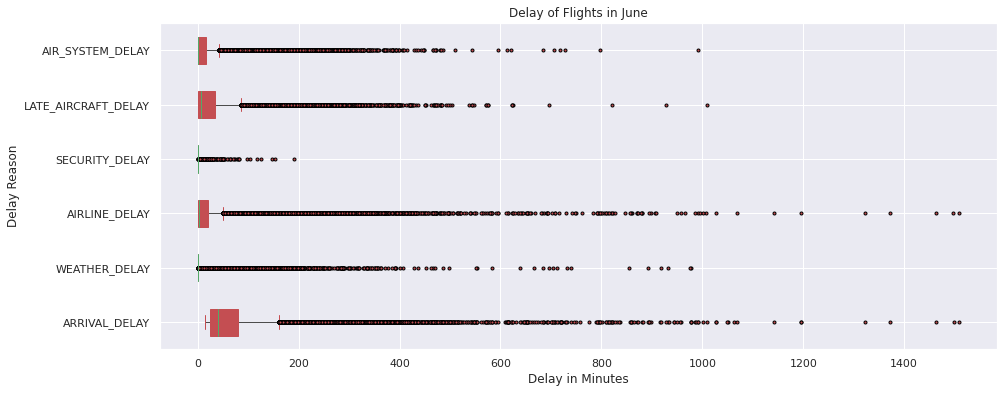

In [14]:
june_delay = no_null_data[(no_null_data['MONTH'] == 6) & (no_null_data['ARRIVAL_DELAY'] > 0)]

# boxplot of delay reason distribution
sns.set_theme(style="darkgrid")
color = dict(boxes='r', medians='g', caps='r')
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
red_square = dict(markerfacecolor='r', marker='.')
ax = june_delay.boxplot(
    column=['ARRIVAL_DELAY', 'WEATHER_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
            'AIR_SYSTEM_DELAY'], color=color, flierprops=red_square, grid=True, patch_artist=True, vert=False)
ax.set_title('Delay of Flights in June')
ax.set_ylabel('Delay Reason')
ax.set_xlabel('Delay in Minutes')
plt.show()

In [15]:
# table with counts of delay reasons in June
june_delay_df = june_delay.melt(
    value_vars=['WEATHER_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY'])
june_delay_df = june_delay_df[june_delay_df["value"] != 0]
june_delay_df_grouped = june_delay_df.groupby("variable").count().sort_values(by="value", ascending=False)
june_delay_df_grouped.index.name = "Reason for Delay"
june_delay_df_grouped.columns = ["Absolute Count"]
sum_of_delays_june = june_delay_df_grouped["Absolute Count"].sum()
print("There are " + str(len(june_delay)) + " delayed flights in June.")
june_delay_df_grouped['Percentage'] = np.round(((june_delay_df_grouped['Absolute Count'] / sum_of_delays_june) * 100),
                                               2)
june_delay_df_grouped

There are 88075 delayed flights in June.


,Absolute Count,Percentage
Reason for Delay,,
LATE_AIRCRAFT_DELAY,49075,33.16
AIRLINE_DELAY,48474,32.75
AIR_SYSTEM_DELAY,44526,30.08
WEATHER_DELAY,5703,3.85
SECURITY_DELAY,235,0.16


In the figures above, you can see that in June, the main reasons for delay are airline and late aircraft delay, followed by air system delay. Especially the airline delay contributes a lot of instances with extremely high delays. The absolute weather delay occurence is relatively low. As shown in the boxplot, the weather delay box is mainly made out of outliers. So presumably, weather delay in June could be caused by rare extreme events like hurricanes.

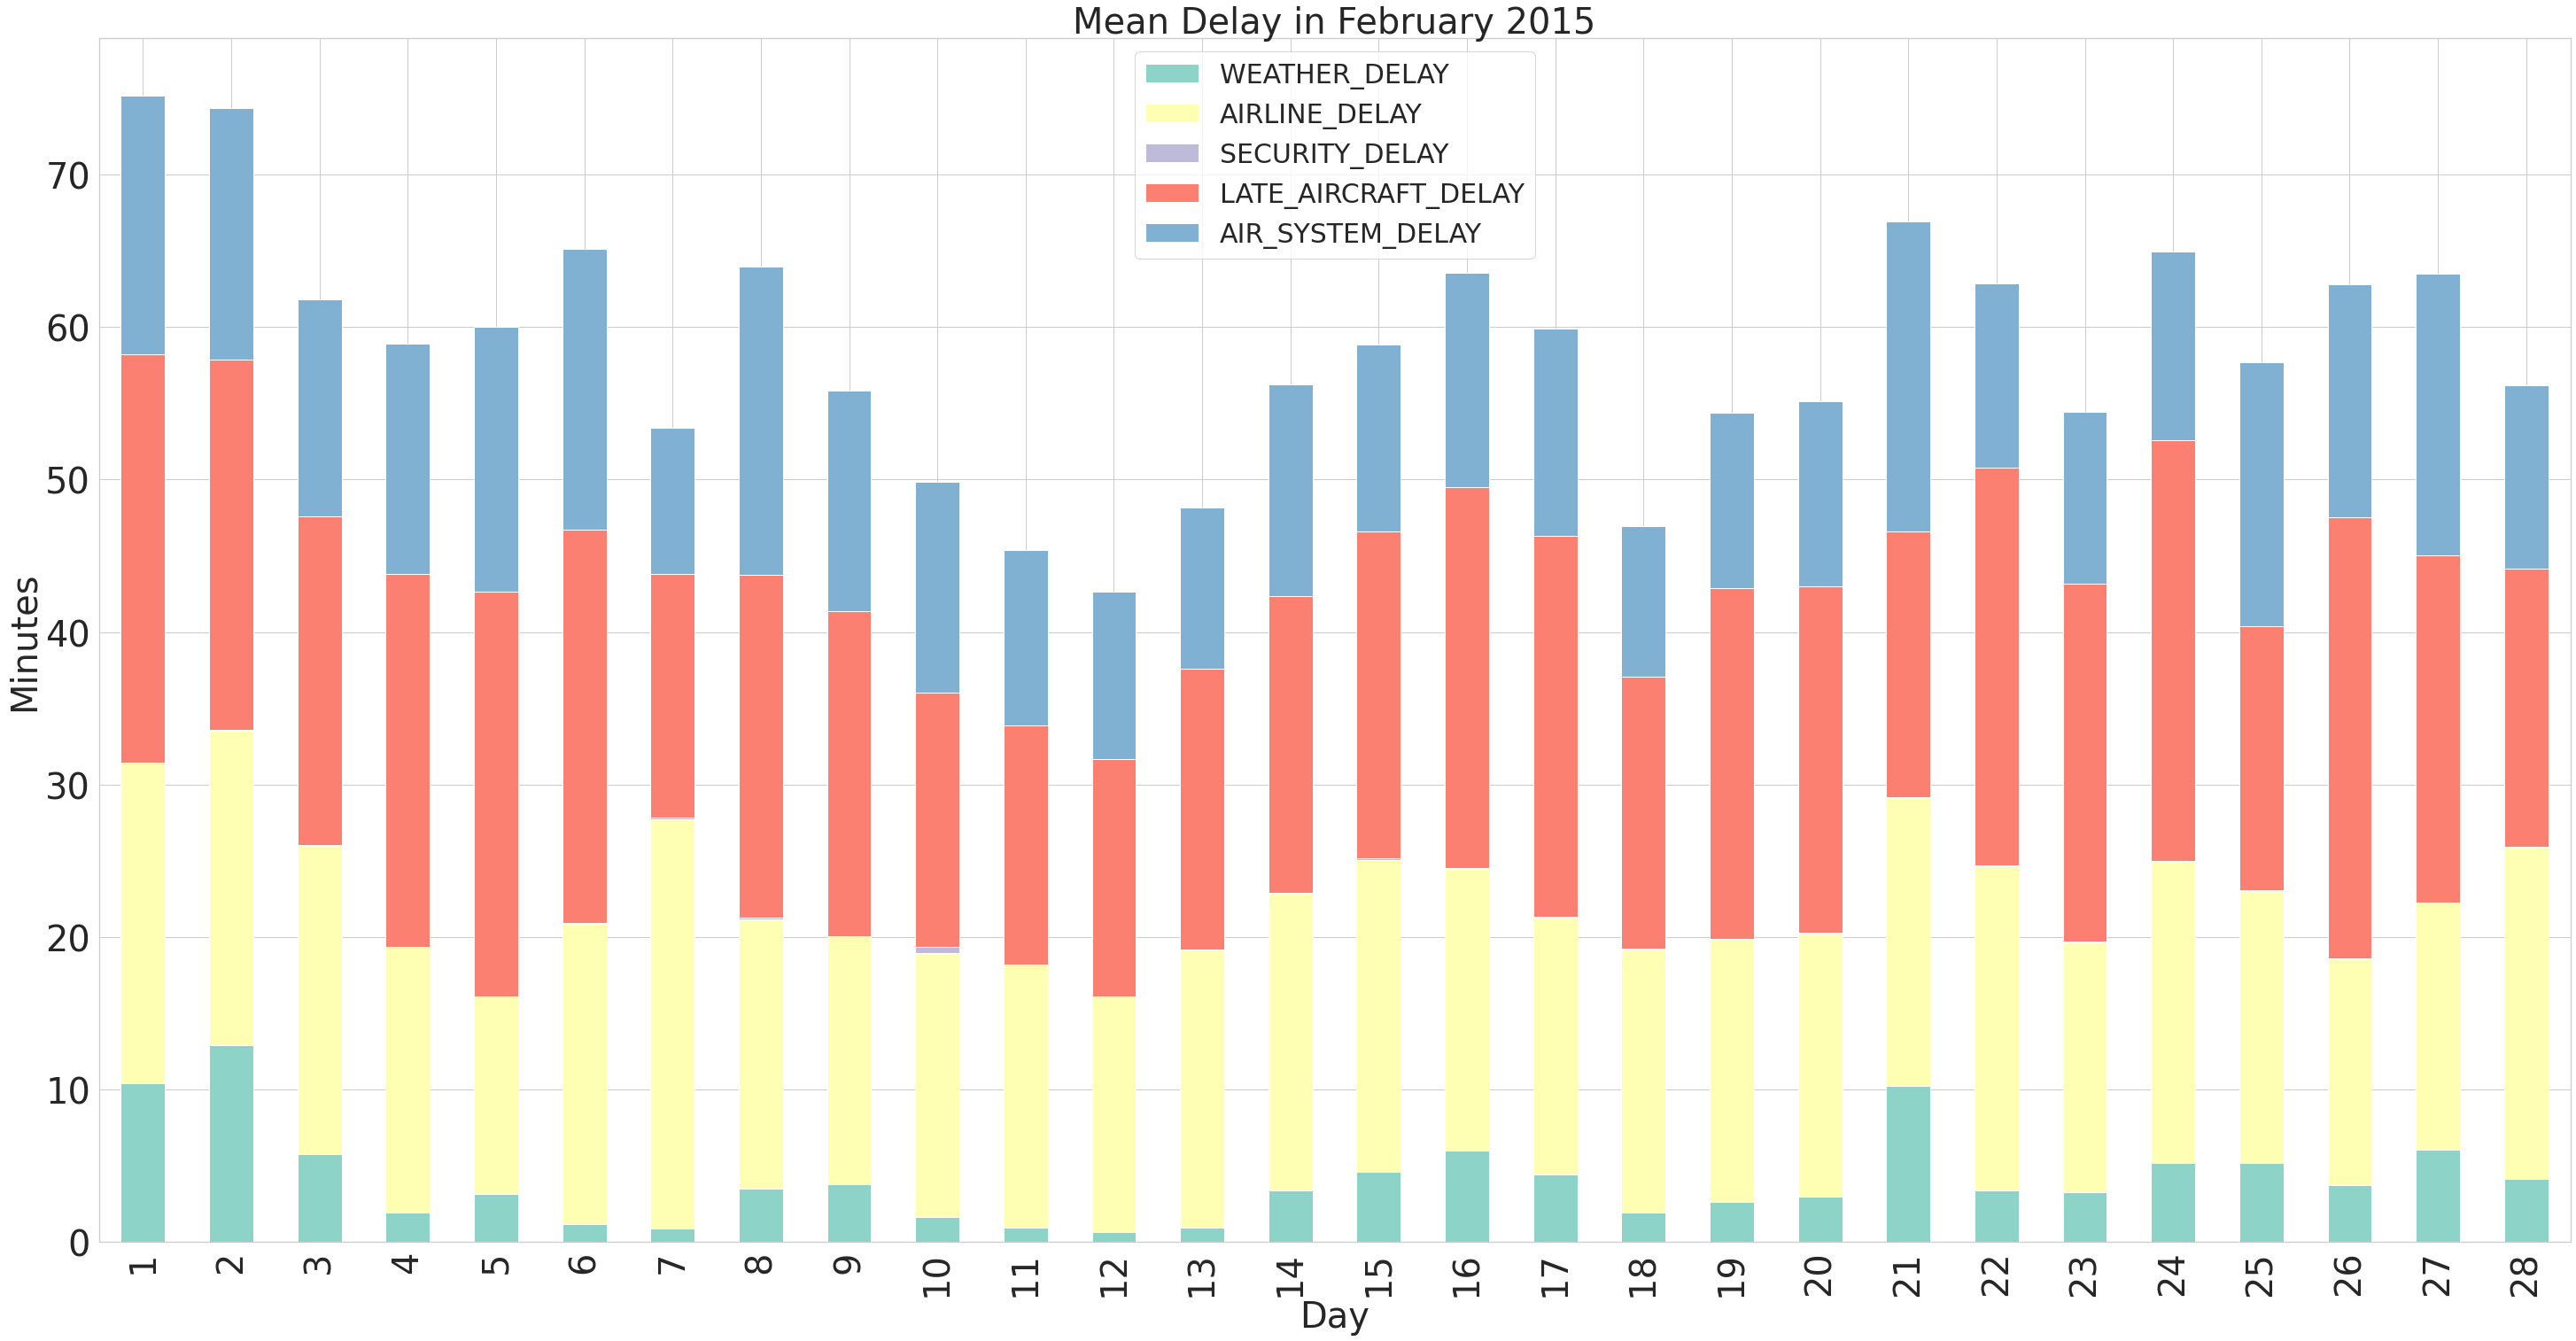

In [16]:
#filter no_null_data for month February
daily_delays_february = no_null_data[no_null_data['MONTH'] == 2]
daily_delays_february = daily_delays_february[
    ['DAY_YEARLY', 'WEATHER_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
     'AIR_SYSTEM_DELAY']].groupby("DAY_YEARLY").mean()
#rearange index from day yearly to (1,29)
daily_delays_february.index = np.arange(1, 29, 1)

#barplot of mean delay for each day in February
sns.set_style("whitegrid")
ax = daily_delays_february.plot(kind='bar', stacked=True, color=plt.cm.Set3(np.arange(5)), figsize=(50, 25))
ax.tick_params(axis='both', which='major', labelsize=40)
ax.set_xlabel('Day', fontsize=40)
ax.set_ylabel('Minutes', fontsize=40)
plt.title("Mean Delay in February 2015", fontsize=40)
ax.legend(fontsize=30)
plt.show()

In the plot above, the daily mean delay in February is shown. What can be observed is that the mean weather delay is higher compared to the weather delay in June. There are a few days (1.,2.,21. February), at which the weather delay is extraordinarily high. For example it could have been really snowy at the beginning of the month. We conclude that indeed the months in Winter tend to have a higher weather delay. However, again weather delay is not the main contributor to arrival delay, instead the delay is mainly caused by airline problems. The air system delay is also changing from day to day. 

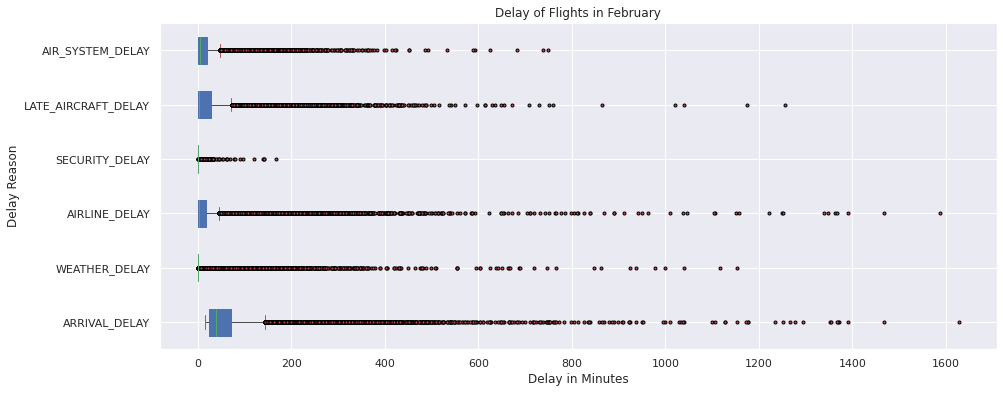

In [17]:
feb_delay = no_null_data[(no_null_data['MONTH'] == 2) & (no_null_data['ARRIVAL_DELAY'] > 0)]

# boxplot of delay reason distribution
sns.set_theme(style="darkgrid")
color = dict(boxes='b', medians='g', caps='r')
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
red_square = dict(markerfacecolor='r', marker='.')
ax = feb_delay.boxplot(
    column=['ARRIVAL_DELAY', 'WEATHER_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
            'AIR_SYSTEM_DELAY'], color=color, flierprops=red_square, grid=True, patch_artist=True, vert=False)
ax.set_title('Delay of Flights in February')
ax.set_ylabel('Delay Reason')
ax.set_xlabel('Delay in Minutes')
plt.show()

In [18]:
# table with counts of delay reasons in February
feb_delay_df = feb_delay.melt(
    value_vars=['WEATHER_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY'])
feb_delay_df = feb_delay_df[feb_delay_df["value"] != 0]
feb_delay_df_grouped = feb_delay_df.groupby("variable").count().sort_values(by="value", ascending=False)
feb_delay_df_grouped.index.name = "Reason for Delay"
feb_delay_df_grouped.columns = ["Absolute Count"]
sum_of_delays_feb = feb_delay_df_grouped["Absolute Count"].sum()
print("There are " + str(len(feb_delay)) + " delayed flights in February.")
feb_delay_df_grouped['Percentage'] = np.round(((feb_delay_df_grouped['Absolute Count'] / sum_of_delays_feb) * 100), 2)
feb_delay_df_grouped

There are 72623 delayed flights in February.


,Absolute Count,Percentage
Reason for Delay,,
AIR_SYSTEM_DELAY,41974,33.56
AIRLINE_DELAY,38334,30.65
LATE_AIRCRAFT_DELAY,37761,30.19
WEATHER_DELAY,6854,5.48
SECURITY_DELAY,161,0.13


In [19]:
# get percentage of flights in June/ February that had a weather delay
abs_weather_delay_june = len(june_delay[june_delay['WEATHER_DELAY'] > 0])
abs_flights_june = len(june_delay)
perc_weather_delay_june = (abs_weather_delay_june / abs_flights_june) * 100

abs_weather_delay_feb = len(feb_delay[feb_delay['WEATHER_DELAY'] > 0])
abs_flights_feb = len(feb_delay)
perc_weather_delay_feb = (abs_weather_delay_feb / abs_flights_feb) * 100

print("Percentage of flights with weather delay in June: " + str(np.round(perc_weather_delay_june, 2)))
print("Percentage of flights with weather delay in February: " + str(np.round(perc_weather_delay_feb, 2)))

Percentage of flights with weather delay in June: 6.48
Percentage of flights with weather delay in February: 9.44


The visualisations above show that the main reason for delay in February is air system delay, followed by airline and late aircraft delay. So the first observation that can be drawn is that contrary to the delay in June, air system seems to be a greater problem in February. Interestingly, the absolute count of instances with weather delay is roughly the same as in June. But if we look at the proportion to the overall count of delays in both month, we can see that the percentage is higher in February (9.44%) than in June (6.48%). What is more, in the boxplot of delay in February it is revealed that there are more flights with extremely high weather delay (> 600 minutes) than in June.
In conclusion, the plots underline the theory that the weather conditions are more prone to cause a delay in winter than in summer.

<b>Note</b>: The percentage of the delay reasons in the tables is calculated by dividing the sum of occurences of a certain delay reason by the sum of all delay occurences. For instance, a flight can have multiple delay reasons at the same time, therefore the absolute count of delay reasons is higher than the number of flights.

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

DAY_OF_WEEK        Mon        Tue        Wed        Thu        Fri        Sat  \
MONTH                                                                           
Jan          58.037422  58.617661  53.321108  54.672316  52.559284  56.116109   
Feb          62.411639  60.398594  53.083634  56.586738  57.641139  59.424318   
Mar          64.146351  56.771456  51.993909  57.326925  53.620602  52.294400   
Apr          61.292481  50.015451  49.949989  59.069431  60.853829  55.265668   
May          68.554375  61.897155  60.402183  51.507061  53.580881  58.656805   
Jun          69.816108  67.121595  65.703694  60.566646  58.771180  61.051236   
Jul          62.166234  60.235118  61.025732  58.120052  56.298890  62.597210   
Aug          63.453013  59.150136  54.853175  63.485981  56.287810  62.819680   
Sep          53.454545  57.532241  48.743148  60.400368  56.943962  51.615443   
Oct          53.278273  48.770175  54.403974  51.256425  62.616843  57.197897   
Nov          52.129458  59.9

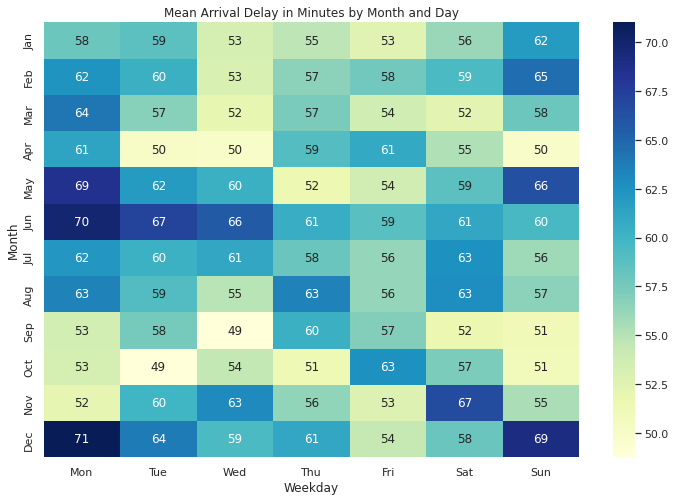

In [20]:
# group dataset by month and day
df_month_day_group = no_null_data.groupby(['MONTH', 'DAY_OF_WEEK'], as_index=False)
# calculate mean arrival delay 
df_month_day_group_mean_delay = df_month_day_group['ARRIVAL_DELAY'].mean()
# convert numerical month to month name
df_month_day_group_mean_delay['MONTH'] = df_month_day_group_mean_delay['MONTH'].apply(lambda x: calendar.month_abbr[x])
# Substract 1 from day of week column to convert numerical day to name of day
df_month_day_group_mean_delay['DAY_OF_WEEK'] = df_month_day_group_mean_delay['DAY_OF_WEEK'] - 1
df_month_day_group_mean_delay['DAY_OF_WEEK'] = df_month_day_group_mean_delay['DAY_OF_WEEK'].apply(
    lambda x: calendar.day_abbr[x])
#print(df_month_day_group_mean_delay)

# lists of unique days and months
days = list(df_month_day_group_mean_delay['DAY_OF_WEEK'].unique())
months = list(df_month_day_group_mean_delay['MONTH'].unique())
# pivot table of month and day / mean delay
pivot_df = df_month_day_group_mean_delay.pivot_table(index='MONTH', columns='DAY_OF_WEEK', values='ARRIVAL_DELAY')
pivot_df = pivot_df.reindex(index=months, columns=days)

print(pivot_df)

# create stacked bar chart 
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True)
plt.title("Mean Arrival Delay in Minutes by Month and Day")
plt.xlabel("Weekday")
plt.ylabel("Month")
plt.show()

Combination of days of week and months that should be avoided to decrease the possibility of the arrival delay the most:
1. December + Monday
2. June + Monday
3. December + Sunday
4. May + Monday
5. June + Tuesday

#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

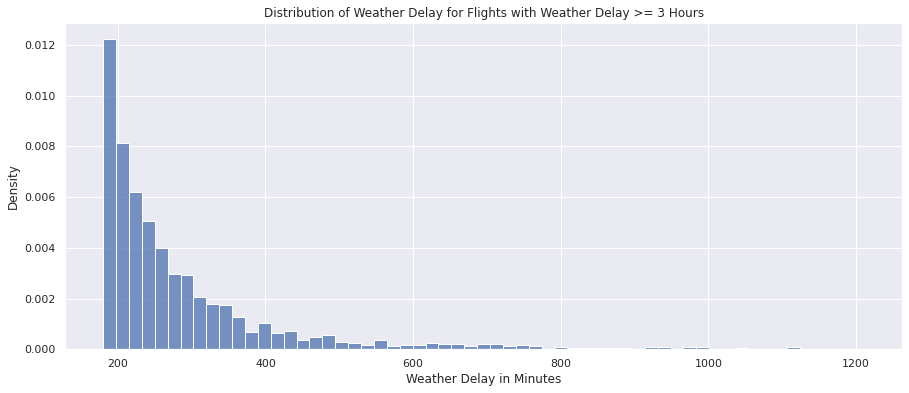

In [21]:
# filter dataset for weather delay >= 3 hours
weather_delay_df = no_null_data[no_null_data['WEATHER_DELAY'] >= 180]

# distribution plot of weather delay
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(weather_delay_df, x='WEATHER_DELAY', ax=ax, stat='density')
plt.title("Distribution of Weather Delay for Flights with Weather Delay >= 3 Hours")
plt.xlabel("Weather Delay in Minutes")
plt.show()

#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

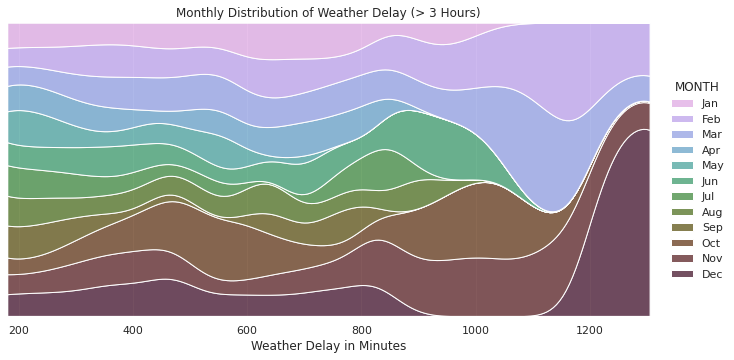

In [22]:
# filter dataset for weather delay > 3 hours
weather_delay_df = no_null_data[no_null_data['WEATHER_DELAY'] > 180]

# subset dataset to month and day
weather_delay_df = weather_delay_df[['MONTH', 'WEATHER_DELAY']]
# convert numerical month to name of month 
weather_delay_df['MONTH'] = weather_delay_df['MONTH'].apply(lambda x: calendar.month_abbr[x])
# order month by converting month name to categorical
weather_delay_df['MONTH'] = pd.Categorical(weather_delay_df['MONTH'], categories=months, ordered=True)

# distribution plot of weather delay by month
sns.displot(data=weather_delay_df, x='WEATHER_DELAY', common_norm=False, hue="MONTH", kind="kde", height=5, aspect=2,
            clip=(180, None), multiple="fill", palette="ch:rot=1.5,light=0.75,hue=1.1")
plt.title("Monthly Distribution of Weather Delay (> 3 Hours)")
plt.xlabel("Weather Delay in Minutes")
plt.ylabel("")
plt.yticks([])
plt.show()

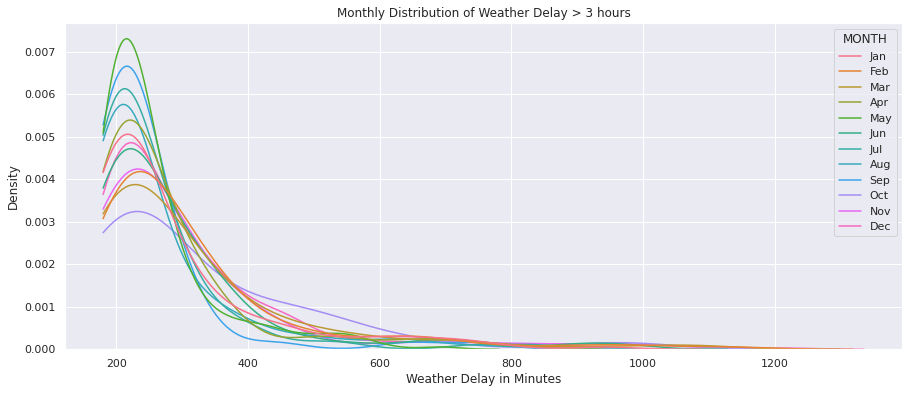

In [23]:
# kde distribution plot of weather delay by month
fig, ax = plt.subplots(figsize=(15, 6))
sns.kdeplot(data=weather_delay_df, x='WEATHER_DELAY', common_norm=False, hue="MONTH", clip=(180, None))
plt.title("Monthly Distribution of Weather Delay > 3 hours")
plt.xlabel("Weather Delay in Minutes")
plt.show()

<b>Note</b>: In the figures above, we plot the distribution for all months. Therefore we have decided to set common_norm=False so that the distribution for each month is normalized independently.

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

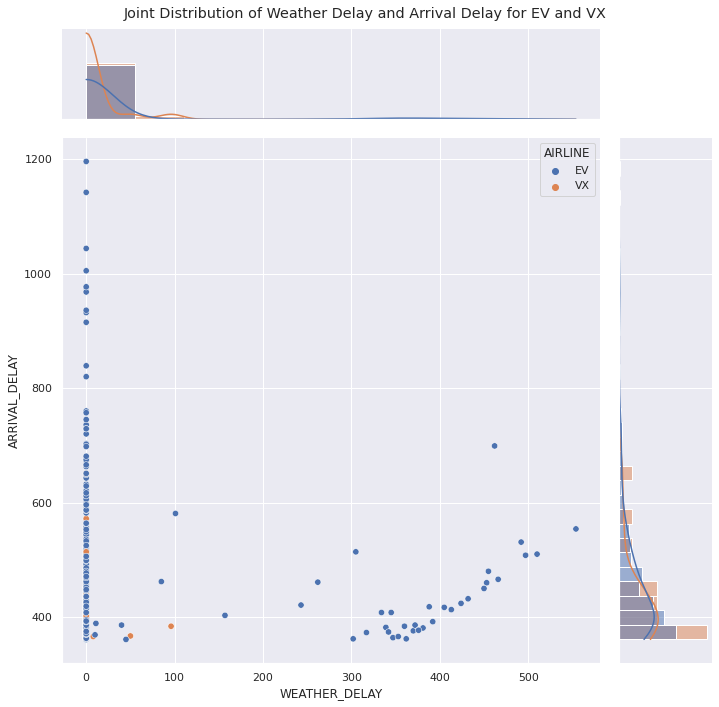

In [24]:
# filter dataset by airline ev and vs
ev_vx = no_null_data[no_null_data['AIRLINE'].isin(['EV', 'VX'])]
# only consider arrival delay > 6 hours
ev_vx_delay = ev_vx[ev_vx['ARRIVAL_DELAY'] > 360]

# joint distribution plot of arrival delay and weather delay
distribution_plot = sns.JointGrid(data=ev_vx_delay, x="WEATHER_DELAY", y="ARRIVAL_DELAY", hue='AIRLINE', height=10)
distribution_plot.plot_joint(sns.scatterplot, s=40)
# bin size verkleinern
distribution_plot.plot_marginals(sns.histplot, stat='density', kde=True, common_norm=False)
distribution_plot.fig.subplots_adjust(top=0.95)
distribution_plot.fig.suptitle('Joint Distribution of Weather Delay and Arrival Delay for EV and VX')
plt.show()

<b>Note</b>: In the figure above, we plot the joint distribution for both airlines. Therefore we have decided to set common_norm=False so that each subset is normalized independently.

Airline EV had a total of 82831 flights.
Of these flights, 452 had a delay > 6 hours. (= 0.5457%)
One reason for delay was weather in 39 cases. (= 8.6283%)
The weather delay was longer than 6 hours in 20 cases. 



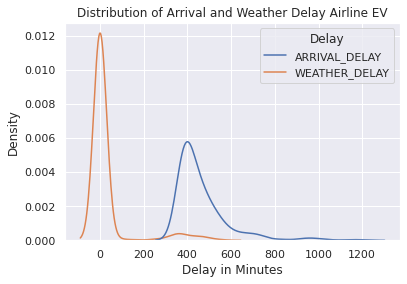

Airline VX had a total of 8924 flights.
Of these flights, 19 had a delay > 6 hours. (= 0.2129%)
One reason for delay was weather in 3 cases. (= 15.7895%)
The weather delay was longer than 6 hours in 0 cases. 



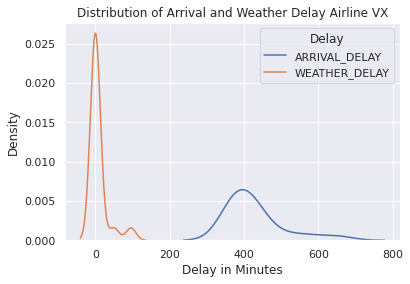

In [25]:
def delay_analysis(airline):
    # filter df for airline
    airline_df = ev_vx_delay[ev_vx_delay['AIRLINE'] == airline]
    airline_df = airline_df[['ARRIVAL_DELAY', 'WEATHER_DELAY']]
    # convert df to long-format for shared kde-plot
    airline_df_melt = airline_df.melt(value_vars=['ARRIVAL_DELAY', 'WEATHER_DELAY'])
    airline_df_melt.columns = ['Delay', 'value']
    # print stats of airline delay
    print("Airline " + airline + " had a total of " + str(
        len(no_null_data[no_null_data['AIRLINE'] == airline])) + " flights.")
    print("Of these flights, " + str(len(airline_df)) + " had a delay > 6 hours. (= " + str(
        np.round(len(airline_df) / len(no_null_data[no_null_data['AIRLINE'] == airline]) * 100, 4)) + "%)")
    print("One reason for delay was weather in " + str(
        len(airline_df[airline_df['WEATHER_DELAY'] > 0])) + " cases. (= " + str(
        np.round(len(airline_df[airline_df['WEATHER_DELAY'] > 0]) / len(airline_df) * 100, 4)) + "%)")
    print("The weather delay was longer than 6 hours in " + str(
        len(airline_df[airline_df['WEATHER_DELAY'] > 360])) + " cases. \n")
    # kdeplot of distribution
    sns.kdeplot(data=airline_df_melt, x='value', hue='Delay', common_norm=False)
    plt.title("Distribution of Arrival and Weather Delay Airline " + str(airline))
    plt.xlabel("Delay in Minutes")
    plt.show()


delay_analysis('EV')
delay_analysis('VX')

The airline EV had more flights with a delay greater than 6 hours than the airline VX. 0.55% of all flights chartered by EV had a delay that took longer than 6 hours, whereas 0.21% of all flights by VX had such a long delay. Weather roughly played the same role in these instances for both airlines. But none of the flights given by VX had a weather delay that took longer than 6 hours. On the other side, EV had to deal with extreme weather conditions at 20 flights (weather delay > 6 hours).

In [26]:
# table of percentage and absolute count for delay reasons
ev_delay_filtered = ev_vx_delay[ev_vx_delay['AIRLINE'] == 'EV']
ev_delay_df = ev_delay_filtered.melt(
    value_vars=['WEATHER_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY'])
ev_delay_df = ev_delay_df.groupby("variable").mean()
ev_delay_df.index.name = "Reason for Delay"
ev_delay_df.columns = ["Mean Value in Minutes"]
print("Airline EV:")
ev_delay_df

Airline EV:


,Mean Value in Minutes
Reason for Delay,
AIRLINE_DELAY,274.219027
AIR_SYSTEM_DELAY,88.495575
LATE_AIRCRAFT_DELAY,71.776549
SECURITY_DELAY,0.000000
WEATHER_DELAY,28.654867


In [27]:
vx_delay_filtered = ev_vx_delay[ev_vx_delay['AIRLINE'] == 'VX']
vx_delay_df = vx_delay_filtered.melt(
    value_vars=['WEATHER_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY'])
vx_delay_df = vx_delay_df.groupby("variable").mean()
vx_delay_df.index.name = "Reason for Delay"
vx_delay_df.columns = ["Mean Value in Minutes"]
print("Airline VX:")
vx_delay_df

Airline VX:


,Mean Value in Minutes
Reason for Delay,
AIRLINE_DELAY,216.105263
AIR_SYSTEM_DELAY,74.263158
LATE_AIRCRAFT_DELAY,128.578947
SECURITY_DELAY,0.000000
WEATHER_DELAY,8.105263


In the tables above, the mean values of the delay reasons for flights with an arrival delay > 6 hours given by airlines EV and VX are displayed. Both airlines share the main reason for such a long delay: airline delay. However, the late aircraft delay averages out at around an hour for the flights in question by EV, whereas the late aircraft delay is twice as high at VX flights. Moreover, weather delay did not contribute as much delay to the flights of note at VX compared to EV.

## Additional Insights

### 1. Airline Delays

In [28]:
################# PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE ###############
pd.options.mode.chained_assignment = None
df_delay = no_null_data[['AIRLINE', 'ARRIVAL_DELAY']]
df_delay['DELAYED'] = 0
df_delay.loc[df_delay['ARRIVAL_DELAY'] > 20.0, 'DELAYED'] = 1

df_delay_grouped = df_delay[['AIRLINE', 'DELAYED']].groupby(['AIRLINE']).sum().reset_index()
df_delay_counter = no_null_data.AIRLINE.value_counts().rename_axis('AIRLINE').reset_index(name='TOTAL_FLIGHTS')

df_merged = pd.merge(df_delay_grouped, df_delay_counter, on='AIRLINE')

# percentage of delayed flights
df_merged['PERCENTAGE_DELAYED'] = round((df_merged['DELAYED'] * 100) / df_merged['TOTAL_FLIGHTS'], 2)
df_merged.rename({'FLIGHT_STATUS': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)

df_merged = df_merged.sort_values(by='PERCENTAGE_DELAYED', ascending=False)
df_merged.head(20)



,AIRLINE,DELAYED,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
7,MQ,38479,46006,83.64
8,NK,21644,25907,83.54
5,F9,14963,18014,83.06
10,UA,66041,79666,82.90
2,B6,37262,45054,82.71
4,EV,67503,82831,81.49
12,VX,7209,8924,80.78
9,OO,66187,81986,80.73
0,AA,79194,98854,80.11
13,WN,143011,179957,79.47


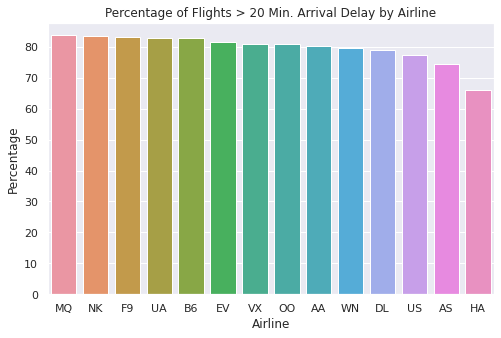

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
ax = sns.barplot(x=df_merged['AIRLINE'], y=df_merged['PERCENTAGE_DELAYED'])
ax.set_title('Percentage of Flights > 20 Min. Arrival Delay by Airline')
ax.set_ylabel('Percentage')
ax.set_xlabel('Airline')
plt.show()

In [30]:
################# PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE ###############
df_delay = no_null_data[['AIRLINE', 'ARRIVAL_DELAY']]
df_delay['DELAYED'] = 0
df_delay.loc[df_delay['ARRIVAL_DELAY'] > 120.0, 'DELAYED'] = 1

df_delay_grouped = df_delay[['AIRLINE', 'DELAYED']].groupby(['AIRLINE']).sum().reset_index()
df_delay_counter = no_null_data.AIRLINE.value_counts().rename_axis('AIRLINE').reset_index(name='TOTAL_FLIGHTS')

df_merged = pd.merge(df_delay_grouped, df_delay_counter, on='AIRLINE')

# percentage of delayed flights
df_merged['PERCENTAGE_DELAYED'] = round((df_merged['DELAYED'] * 100) / df_merged['TOTAL_FLIGHTS'], 2)
df_merged.rename({'FLIGHT_STATUS': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)

df_merged = df_merged.sort_values(by='PERCENTAGE_DELAYED', ascending=False)
df_merged.head(20)

,AIRLINE,DELAYED,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
5,F9,2462,18014,13.67
10,UA,10742,79666,13.48
8,NK,3336,25907,12.88
4,EV,10583,82831,12.78
2,B6,5334,45054,11.84
7,MQ,5402,46006,11.74
3,DL,10376,89779,11.56
9,OO,9143,81986,11.15
0,AA,10358,98854,10.48
12,VX,908,8924,10.17


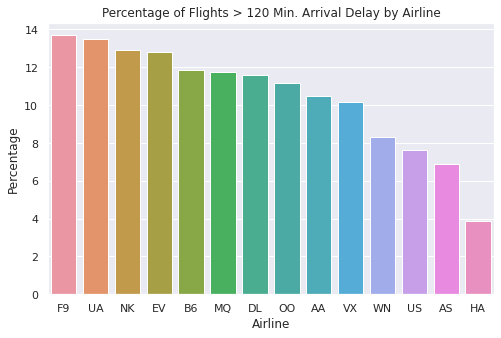

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
ax = sns.barplot(x=df_merged['AIRLINE'], y=df_merged['PERCENTAGE_DELAYED'])
ax.set_title('Percentage of Flights > 120 Min. Arrival Delay by Airline')
ax.set_ylabel('Percentage')
ax.set_xlabel('Airline')
plt.show()

In the plots above, the proportion of delayed flights to the overall count of flights per airline is depicted. First of all, all flights with a delay > 20 minutes are considered. You can see that each airline has a high percentage of flights with this delay, most of them around 80%. The only airline that stands out is airline 'HA': just 66% of its flights have a delay > 20 minutes. Airline 'HA' is followed by 'AS', 25% of their flights had a delay less than 20 minutes. The differences between airlines get larger if we filter for flights with a delay of more than two hours. Following the results, we can group the airlines into three classes:
1. High tendency for high delay: F9, UA, NK, EV
2. Medium tendency for high delay: B6, MQ, DL, OO, AA, VX
3. Low tendency for high delay: US, AS, HA

Again, airline 'HA' has the lowest percentage of flights with extremely high delay. To sum up, in order to avoid a delay, one should probably rather book a flight given by the airline 'HA' than for example 'F9', 'UA' or 'NK'. 

So far, in the exploratory data analysis we have conducted that unswayable events like extreme weather can lead to an extremely high delay. Yet, the highest mean delay regarding the individual delay reasons is given by airline and late aircraft delay. Both of them are mostly evoked by the airlines themselves. If an airline is bad at planning the airport operations like baggage shipping or passenger processing, the airline delay increases. The two delay reasons therefore can serve as a kind of quality attribute. That is why we take a closer look at the mean values of these delays for each airline.

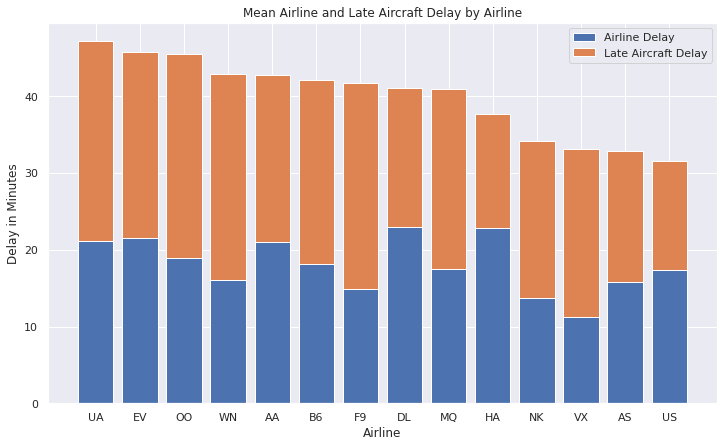

In [32]:
# get mean values of late aircraft and airline delay for each airline
airline_service = no_null_data[['AIRLINE', 'ARRIVAL_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY']]
airline_service_grouped = airline_service[['AIRLINE', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY']].groupby(
    ['AIRLINE']).mean().reset_index()
airline_service_grouped['TOTAL_MEAN'] = airline_service_grouped['AIRLINE_DELAY'] + airline_service_grouped[
    'LATE_AIRCRAFT_DELAY']
airline_service_grouped = airline_service_grouped.sort_values(by='TOTAL_MEAN', ascending=False)

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x=airline_service_grouped['AIRLINE'], height=airline_service_grouped['AIRLINE_DELAY'], label='Airline Delay')
ax.bar(x=airline_service_grouped['AIRLINE'], height=airline_service_grouped['LATE_AIRCRAFT_DELAY'],
       bottom=airline_service_grouped['AIRLINE_DELAY'], label='Late Aircraft Delay')
ax.set_xlabel('Airline')
ax.set_ylabel('Delay in Minutes')
ax.set_title('Mean Airline and Late Aircraft Delay by Airline')
ax.legend(loc=1)
plt.show()

If we exclusively look at airline and late aircraft delay, we can see that the airline US has an average of 30 minutes delay, whereas airline UA averages out at roughly 45 minutes. For instance the airline NK which we classified as "high tendency for high delay" beforehand is in the lower range of airline-caused delays. It indicates that at least their high percentage of flights with extreme delays is more likely "bad luck". On the other hand, UA is leading at the percentage of flights with extreme delays as well as the average delay caused by airline problems. So indeed, we should be careful at booking a flight given by UA if we want to avoid delays. 

### 2. Daytime Delays

In [33]:
# subset for scheduled departure category 
df_delay = no_null_data[['SCHEDULED_DEPARTURE_CATEGORY', 'ARRIVAL_DELAY']]
df_delay['DELAYED'] = 0
df_delay.loc[df_delay['ARRIVAL_DELAY'] > 20.0, 'DELAYED'] = 1

df_delay_grouped = df_delay[['SCHEDULED_DEPARTURE_CATEGORY', 'DELAYED']].groupby(
    ['SCHEDULED_DEPARTURE_CATEGORY']).sum().reset_index()
df_delay_counter = no_null_data['SCHEDULED_DEPARTURE_CATEGORY'].value_counts().rename_axis(
    'SCHEDULED_DEPARTURE_CATEGORY').reset_index(name='TOTAL_FLIGHTS')

df_merged = pd.merge(df_delay_grouped, df_delay_counter, on='SCHEDULED_DEPARTURE_CATEGORY')

# percentage of delayed flights
df_merged['PERCENTAGE_DELAYED'] = round((df_merged['DELAYED'] * 100) / df_merged['TOTAL_FLIGHTS'], 2)
df_merged.rename({'FLIGHT_STATUS': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)

df_merged = df_merged.sort_values(by='PERCENTAGE_DELAYED', ascending=False)
df_merged.head(20)


,SCHEDULED_DEPARTURE_CATEGORY,DELAYED,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
1,Evening,195086,235115,82.97
0,Afternoon,274199,338284,81.06
2,Morning,169041,218513,77.36
3,Night,12306,16317,75.42


The table reveals that there are differences between the different scheduled departure categories concerning the percentage of delayed flights (where delay is > 20 minutes). To be more precise, flights that are scheduled in the evening are delayed in 83% of the cases. In contrast, 75% of the flights that took place in the night were delayed. Moreover, the number of total flights in the night is lower than during the day. Presumably the higher air traffic during the day leads to more complications, late aircrafts and operating delays. Therefore, booking a flight that is scheduled in the night could potentially lower the risk of experiencing a delay.

### 3. Airport Delays

In the following, we take a closer look at the origin and destination airports to check if there are noticeable differences concerning flight delay. We only consider airports with a total number of flights (arrived + departed) over 1000.

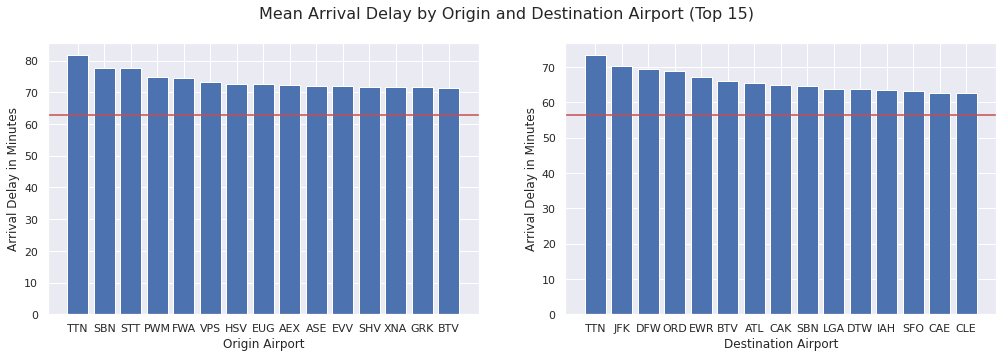

In [34]:
########### ORIGIN AND DESTINATION AIRPORT #################
df_airports = no_null_data[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY', 'WEATHER_DELAY']]

# get mean arrival delay for origin and destination airport, respectively
df_airport_origin = df_airports.groupby("ORIGIN_AIRPORT")
df_airport_origin_weather = df_airport_origin['WEATHER_DELAY'].mean()
df_airport_origin_count = df_airport_origin.size().rename_axis('Airport').to_frame('flights_origin')
df_airport_origin_count['WEATHER_ORIGIN'] = df_airport_origin_weather
df_airport_destination = df_airports.groupby("DESTINATION_AIRPORT")
df_airport_destination_weather = df_airport_destination['WEATHER_DELAY'].mean()
df_airport_destination_count = df_airport_destination.size().rename_axis('Airport').to_frame('flights_destination')
df_airport_destination_count['WEATHER_DEST'] = df_airport_destination_weather

df_airport_origin_delay = df_airports.groupby("ORIGIN_AIRPORT")['ARRIVAL_DELAY'].mean().rename_axis('Airport').to_frame(
    'mean_delay_origin')
df_airport_destination_delay = df_airports.groupby("DESTINATION_AIRPORT")['ARRIVAL_DELAY'].mean().rename_axis(
    'Airport').to_frame('mean_delay_destination')

df_airports_merged = df_airport_origin_count.join(
    [df_airport_destination_count, df_airport_origin_delay, df_airport_destination_delay], how='outer')
df_airports_merged['average_delay'] = df_airports_merged[['mean_delay_origin', 'mean_delay_destination']].mean(axis=1)
df_airports_merged['difference_delay'] = df_airports_merged['mean_delay_origin'] - df_airports_merged[
    'mean_delay_destination']
df_airports_merged['total_flights'] = df_airports_merged['flights_origin'] + df_airports_merged['flights_destination']

# Consider only Airports with > 1000 flights
df_airports_merged = df_airports_merged[df_airports_merged['total_flights'] > 1000]

#-------------------- Plot mean delay for origin/ destination airports-----------------------
fig, ax = plt.subplots(1, 2, figsize=(17, 5))
fig.suptitle('Mean Arrival Delay by Origin and Destination Airport (Top 15)', fontsize=16)
sns.set_palette("Set2")

top_delays_airport_origin = df_airports_merged.sort_values(by='mean_delay_origin', ascending=False).head(15)
ax[0].bar(x=top_delays_airport_origin.index, height=top_delays_airport_origin['mean_delay_origin'])
ax[0].axhline(y=df_airports_merged['mean_delay_origin'].mean(), color='r', linestyle='-')
ax[0].set_xlabel("Origin Airport")
ax[0].set_ylabel("Arrival Delay in Minutes")

top_delays_airport_dest = df_airports_merged.sort_values(by='mean_delay_destination', ascending=False).head(15)
ax[1].bar(x=top_delays_airport_dest.index, height=top_delays_airport_dest['mean_delay_destination'])
ax[1].axhline(y=df_airports_merged['mean_delay_destination'].mean(), color='r', linestyle='-')
ax[1].set_xlabel("Destination Airport")
ax[1].set_ylabel("Arrival Delay in Minutes")
plt.show()

The figure shows the mean arrival delay of flights that depart from a certain airport (origin airport) or arrive at a certain airport (destination airport). So, for example a flight with the origin "JFK" will arrive 70 minutes late on average. A conclusion that can be drawn from the plots is that the airport "TTN" is leading at the mean arrival delay in both positions (origin and destination). Airport "SBN" has the second highest mean delay as an origin airport and a high mean delay as a destination airport vice versa. Next, we will visualize the delay reasons of flights that depart from "TTN" and "SBN" to explore if there are any differences.

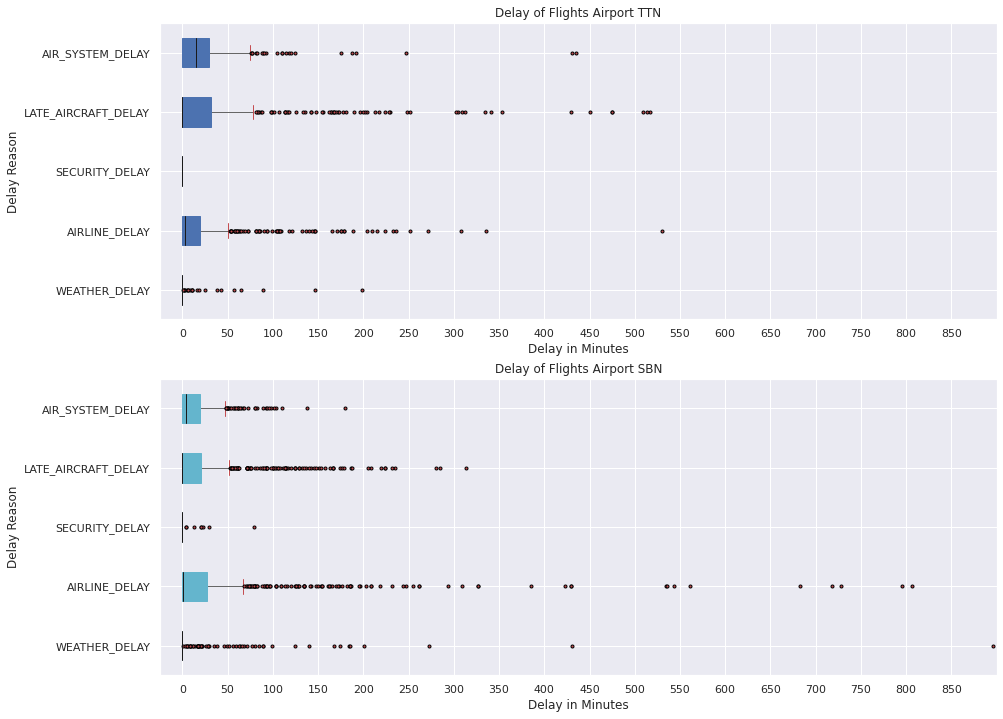

In [35]:
ttn_delay = no_null_data[(no_null_data['ORIGIN_AIRPORT'] == 'TTN')]

# boxplot of delay reasons for both airports
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

c1 = dict(boxes='b', medians='k', caps='r')
red_square = dict(markerfacecolor='r', marker='.')
ttn_delay.boxplot(
    column=['WEATHER_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY'], ax=ax[0],
    flierprops=red_square, color=c1, patch_artist=True, grid=True, vert=False)
ax[0].set_title('Delay of Flights Airport TTN')
ax[0].set_ylabel('Delay Reason')
ax[0].set_xlabel('Delay in Minutes')
ax[0].set_xlim(-25, 900)
ax[0].xaxis.set_ticks(np.arange(0, 900, 50))

sbn_delay = no_null_data[(no_null_data['ORIGIN_AIRPORT'] == 'SBN')]
c2 = dict(boxes='c', medians='k', caps='r')
sbn_delay.boxplot(
    column=['WEATHER_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY'], ax=ax[1],
    color=c2, patch_artist=True, flierprops=red_square, grid=True, vert=False)
ax[1].set_title('Delay of Flights Airport SBN')
ax[1].set_ylabel('Delay Reason')
ax[1].set_xlabel('Delay in Minutes')
ax[1].set_xlim(-25, 900)
ax[1].xaxis.set_ticks(np.arange(0, 900, 50))

plt.show()

If we compare airport TTN with SBN, we can observe that the delay reasons in fact differ. To begin with, the air system delay is significantly higher for flights that depart from TTN. Considering SBN, there are a few outliers with max. value of 180 minutes, on the other hand TTN had outliers with almost 450 minutes delay caused by air system problems. It seems that at airport TTN, there are complications within the airport operations or the flights have routes where the air traffic is problematic. Also, there are a lot of extremely high delays of flights at TTN at which the late aircraft delay is significant. On the other hand, SBN had a few security related issues, whereas there are almost no security delays at TTN. Similarly, there are more extreme airline delays at SBN in comparison to TTN. If we look at weather delay, again SBN had more flights with delays caused by extreme weather conditions than TTN. To conclude, we observe that although both airports approximately have the same mean arrival delay (as origin airports), the reasons for delay distinguish.

## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [36]:
# filter dataset by airline ua
ua = no_null_data[no_null_data['AIRLINE'] == 'UA']
# only consider flights with arrival delay
ua_delay = ua[ua['ARRIVAL_DELAY'] > 0]

# create column for acceptable/ unacceptable delay
ua_delay['DELAY'] = 'acceptable_delay'
# if arrival delay is larger 45 minutes, set delay to unacceptable
ua_delay.loc[ua_delay['ARRIVAL_DELAY'] > 45, 'DELAY'] = 'unacceptable_delay'

# find equal sized distance
distance_width = (ua_delay['DISTANCE'].max() - ua_delay['DISTANCE'].min()) / 2

# create distance category feature  
short = ua_delay['DISTANCE'].min() + distance_width
ua_delay['DISTANCE_CATEGORY'] = 'short'
ua_delay.loc[ua_delay['DISTANCE'] > short, 'DISTANCE_CATEGORY'] = 'long'

#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

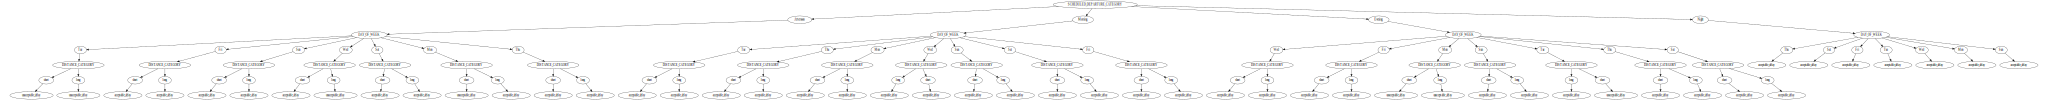

In [37]:
from p_decision_tree.DecisionTree import DecisionTree

# convert numerical day of week to name of day
ua_delay['DAY_OF_WEEK'] = ua_delay['DAY_OF_WEEK'] - 1
ua_delay['DAY_OF_WEEK'] = ua_delay['DAY_OF_WEEK'].apply(lambda x: calendar.day_abbr[x])

# list of descriptive features
descriptive_features = ['SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', 'DAY_OF_WEEK']
# set target feature
label = 'DELAY'

# subset dataframe to descriptive and target data
descriptive_data = ua_delay[descriptive_features].values
label_data = ua_delay[label].values

# build the decision tree
decision_tree = DecisionTree(descriptive_data, descriptive_features, label_data, "entropy")
# set minimum samples for splitting
decision_tree.id3(0, 1000)

# visualize decision tree
visualize = decision_tree.print_visualTree(render=True)
display(visualize)

#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

In the second round of ID3, "Day of Week" is considered as the best feature for splitting, given that the scheduled departure category is chosen in the first round.
    

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

The first observation is that if flights are scheduled in the afternoon, the possibility of a delay increases. Especially when the flight takes place on a Monday, the decision tree predicts an arrival delay. If the flight is scheduled on a Sunday afternoon and it is only a short distance flight, the decision is to predict an arrival delay. Similarly, if the flight is scheduled on a Sunday or Monday evening with a short distance, the decision is to predict an arrival delay. 

One explanation for the tendency of a higher arrival delay on afternoons is that there are more flights on afternoons in general, so the air traffic is fully occupied which leads to delays in processes. If travelers want to spend a weekend abroad, they tend to go on Fridays and Mondays. Besides, if they want to have a head start on the upcoming week abroad, they probably fly on Sunday. On the other hand, commuters take flights on Friday and Monday to return home or to their job location, respectively. These could be possible explanations for the decision rules of the discovered tree.



## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import os

os.environ["PYTHONUNBUFFERED"] = "1"

In [39]:
df = pd.read_csv('flights_classifying.csv')

Randomly order the data points using one of the group member's students as the random state.

In [40]:
df = df.sample(frac=1, random_state=435389).reset_index(drop=True)

### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [41]:
# create target feature, add as column and set it to 1 if arrival delay > 3 hours
target = "LONG_DELAY"
df[target] = df["ARRIVAL_DELAY"].apply(lambda x: 1 if x > 180 else 0)
df = df.loc[df.CANCELLED != 1]

#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [42]:
# list of columns to keep for building the ML models
label_encoder_columns = []
one_hot_columns = ['DAY_OF_WEEK', 'SCHEDULED_DEPARTURE_CATEGORY', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'MONTH']

In [43]:
# normalize flight distance
min_max_scaler = MinMaxScaler()
df['DISTANCE'] = min_max_scaler.fit_transform(df[['DISTANCE']].to_numpy())

# encode columns with label encoder
for column in label_encoder_columns:
    df[column] = LabelEncoder().fit(df[column]).transform(df[column])

# drop no longer needed features of the dataset\n",
columns_to_keep = ['LONG_DELAY', 'DISTANCE'] + label_encoder_columns + one_hot_columns
df = df[columns_to_keep]

# remove old columns and add new one hot encoded columns
for col in one_hot_columns:
    col_ohe = pd.get_dummies(df[col], prefix=col)
    df = pd.concat((df, col_ohe), axis=1).drop(col, axis=1)

For the descriptive features, we cannot use the delay reason columns like weather or late aircraft delay as this is information collected after the flight has been completed. So the focus is to select features that indeed are known beforehand. In the previous tasks, we have seen that there are different time-dependend factors influencing the probability of a delay: the day of the week, the month and the daytime the flight is scheduled to start. Furthermore there are differences between the airlines concerning the likelihood of a delay, therefore the airline is added as a feature as well. The origin and destination airports differ from each other in size and level of air traffic - which could be an influencing factor. Thus, the airport is part of the descriptive features. All of the mentioned features are categorical, which is why we transformed the columns by the One Hot Encoder. The last feature we have added is the distance, because by creating the decision tree, we observed that short distance flights tend to have have a higher delay. We normalized this feature to deal with the broad range of distances.

Because we decided to use one-hot encoding for all features, we generate over 600 feature columns. In order to keep runtimes low and lower the dimensionality of the models, we filter out any columns that are not correlating with the target value.

In [44]:
# filter out all columns where the correlation with the target column is under a certain value
epsilon = 0.002
corr = df.corrwith(df['LONG_DELAY'])
corr = corr.sort_values(ascending = False)
corr.head(10)
corr.drop(corr[(corr < epsilon) & (corr > -epsilon) ].index, inplace=True)
df = df[corr.index.values.tolist()]
print(f"{len(df.columns)-1} descriptive features remain after filtering")

407 descriptive features remain after filtering


In [45]:
# delete target feature from descriptive feature list
descriptive_features = list(df.columns)
descriptive_features.remove('LONG_DELAY')

Split your data into training and testing data, with 85% of the dataset going to testing data.

In [46]:
# split dataframe into train and test set
X_train, X_test, y_train, y_test = train_test_split(df[descriptive_features], df[target], test_size=0.85,
                                                    random_state=123)

#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [47]:
# some functions to keep the following code shorter

def roc_curve_evaluation(y_test, y_pred, name):
    """Plot roc curve and return roc score."""
    fp, tp, threshold = roc_curve(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)
    print("ROC Score is: " + str(roc_score))
    plt.subplots(1, figsize=(3, 3))
    plt.title(name)
    plt.plot(fp, tp)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_score


def cv_score(clf, x_test, y_test):
    """Calculate and print cross validation score."""
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(clf, x_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
    print(scores)


def print_confusion_matrix(y_test, y_pred):
    """Print confusion matrix and number of true/false positive and true/false negative values."""
    print("confusion matrix:")
    matrix = confusion_matrix(y_test, y_pred)
    values = matrix.ravel()
    print(matrix)
    print(f"tp: {values[3]}, fp: {values[2]}, tn: {values[0]}, fn: {values[1]}")


def evaluate(model, X_test, y_test):
    """Call all functions needed for evaluation and return roc score as well as the prediction."""
    y_pred = model.predict(X_test)
    roc_score = roc_curve_evaluation(y_test, model.predict_proba(X_test)[:, 1],
                                    'Receiver Operating Characteristic - SVM')
    print_confusion_matrix(y_test, y_pred)
    print(f"precision: {precision_score(y_test, y_pred)}")
    return roc_score, y_pred

The setting of the task requires a binary classification. Typical evaluation metrics for classification are the following: Precision-recall (F1-Score), accuracy, log-loss and ROC. The dataset clearly has a large class-imbalance as the number of instances that are classified as 1/ reimbursement is significantly lower than the instances in class 0/ no reimbursement. Therefore, log-loss is not a suitable evaluation metric because the log-loss function is symmetric and does not differentiate between classes. Accuracy is not a proper measure as well: even if the model performs really bad, meaning it classifies every flight as class 0, the accuracy would be above 90% because of the class imbalance. So the evaluation metrics of interest are the ROC and Precision-recall, more precisely the F1-Score. Both are suitable for imbalanced class distributions. In general, F1-Score is a good measure if one would like to seek a balance between precision and recall. In our case, we would like to only predict a flight to be classified as reimbursement if the probability of a long delay is really high - otherwise we would lose money if we buy a ticket for a flight and it actually does not have a delay longer than the threshold. Therefore, we are especially interested in a model with a high precision. We want to have a low false positive rate (FPR) and a high true positive rate (TPR). In the ROC curve, these FPR and TPR are plotted against each other. Thus, we decide to use the ROC curve and ROC-AUC score (area under the curve) as our metric in order to evaluate our model in combination with the precision and F1-score.
    
    

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

ROC Score is: 0.498910641783763


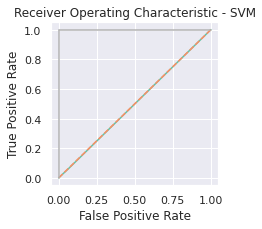

confusion matrix:
[[385082  29477]
 [ 29857   2331]]
tp: 2331, fp: 29857, tn: 385082, fn: 29477
precision: 0.07328345070422536


In [48]:
classifier_dummy = DummyClassifier(strategy="stratified")
classifier_dummy.fit(X_train, y_train)
roc_dummy, pred_dummy = evaluate(classifier_dummy, X_test, y_test)

To calculate the baseline of the evaluation metric, a dummy classifier by sklearn is used. By setting the strategy parameter to "stratified", it generates predictions by respecting the training set's class distribution. The ROC-AUC score is roughly 50%, which indicates the prediction made by the dummy classifier is random. 
    
    

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


In the original dataset, there is a significant class imbalance: 93% of the flights are not eligible for reimbursement, whereas only 7% have a delay that lays above the threshold. To avoid biased model predictions, the train set is upsampled. This results in a train set with a balanced amount of flights with delay less than 180 minutes and more than 180 minutes.

Note: A problem of upsampling the training data is that cross validation becomes less reliable. This is because in an upsampled dataset there are multiple instances of the same datapoints from the minority class. Therefore, when splitting the dataset for cross-validation, it is possible that the same datapoint can be in the training- and validation-set.
To avoid this issue, we use the unbalanced dataset for training the regression and svm, but set the class_weight parameter to "balanced", which has the same effect as upsampling the data, without effecting the cross-validation.
However, for the MLPClassifier this is not possible. There exist ways to implement a resampling of the dataset for every step in the cross validation using the scikit-learn imbalanced-learn package. But as it is not encouraged to use other packages than those specified in the .yaml file, we decided to not include it in this notebook. For this reason, we use the upsampled dataset for the cross validation of the MLPClassifier training despite its drawback.

#### a) Regression:
Train, finetune and evaluate a regression model.

ROC Score is: 0.6221957289426376


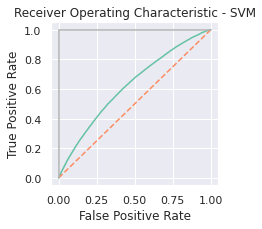

confusion matrix:
[[245439 169120]
 [ 13295  18893]]
tp: 18893, fp: 13295, tn: 245439, fn: 169120
precision: 0.10048773223128188


(0.6221957289426376, array([0, 0, 1, ..., 0, 1, 0]))

In [49]:
# create default Logistic Regression Model
logReg_clf = LogisticRegression(C=0.1, solver="lbfgs", multi_class='ovr', max_iter=1000, class_weight="balanced", n_jobs=-1)

# fit the train data
logReg_clf.fit(X_train, y_train)

evaluate(logReg_clf, X_test, y_test)

In [50]:
param_grid = {
            "solver":["lbfgs", "saga"],
            "C": [0.1, 0.2, 0.5],

}

basic_logRef = LogisticRegression(multi_class='ovr', max_iter=1000, class_weight="balanced")

logReg_tuned = GridSearchCV(basic_logRef, param_grid, scoring="roc_auc", cv=2, n_jobs=-1,
                            refit=True, verbose=1)

logReg_tuned.fit(X_train, y_train)
print(f'Best score: {logReg_tuned.best_score_} with param: {logReg_tuned.best_params_}')

Fitting 2 folds for each of 6 candidates, totalling 12 fits


/home/hannes/.conda/envs/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/hannes/.conda/envs/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/hannes/.conda/envs/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/hannes/.conda/envs/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/hannes/.conda/envs/venv/lib/python3.9/site-packages/sklearn/linear

Best score: 0.6196692783154433 with param: {'C': 0.1, 'solver': 'lbfgs'}


ROC Score is: 0.6221957269192299


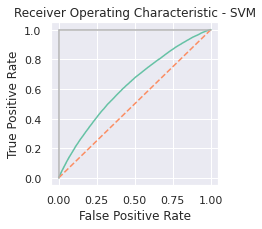

confusion matrix:
[[245439 169120]
 [ 13295  18893]]
tp: 18893, fp: 13295, tn: 245439, fn: 169120
precision: 0.10048773223128188


In [51]:
roc_reg, pred_reg = evaluate(logReg_tuned, X_test, y_test)

#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

ROC Score is: 0.5779134813368002


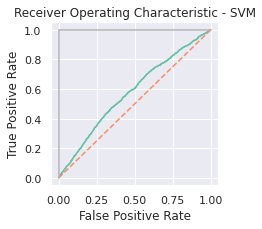

confusion matrix:
[[11153  7348]
 [  731   768]]
tp: 768, fp: 731, tn: 11153, fn: 7348
precision: 0.09462789551503203


(0.5779134813368002, array([0, 0, 0, ..., 0, 0, 0]))

In [52]:
X_train_trimmed = X_train[:10000]
y_train_trimmed = y_train[:10000]

svm_model = svm.SVC(kernel="linear", probability=True, class_weight="balanced")

#Train the model using the training sets
svm_model.fit(X_train_trimmed, y_train_trimmed)

evaluate(svm_model, X_test[:20000], y_test[:20000])

In [53]:
X_train_trimmed = X_train[:7500]
y_train_trimmed = y_train[:7500]

hyperparam_grid = {
    'C': [0.1, 10],
    'gamma': ['scale', 0.001, 0.0001],
}

svm_basic = svm.SVC(probability=True, class_weight="balanced", kernel="linear")

svm_tuned = GridSearchCV(svm_basic, param_grid=hyperparam_grid, refit=True, n_jobs=-1,
                         scoring='roc_auc', cv=3, verbose=2)

svm_tuned.fit(X_train_trimmed, y_train_trimmed)
print(f'Best score: {svm_tuned.best_score_} with param: {svm_tuned.best_params_}')

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .................................C=0.1, gamma=scale; total time= 2.6min
[CV] END ................................C=0.1, gamma=0.0001; total time= 2.6min
[CV] END .................................C=0.1, gamma=0.001; total time= 2.6min
[CV] END ................................C=0.1, gamma=0.0001; total time= 2.6min
[CV] END .................................C=0.1, gamma=scale; total time= 2.7min
[CV] END .................................C=0.1, gamma=0.001; total time= 2.7min
[CV] END .................................C=0.1, gamma=scale; total time= 2.7min
[CV] END ................................C=0.1, gamma=0.0001; total time= 2.7min
[CV] END ..................................C=10, gamma=scale; total time= 2.7min
[CV] END .................................C=0.1, gamma=0.001; total time= 2.7min
[CV] END ..................................C=10, gamma=scale; total time= 2.7min
[CV] END ..................................C=10, 

ROC Score is: 0.5937351231947969


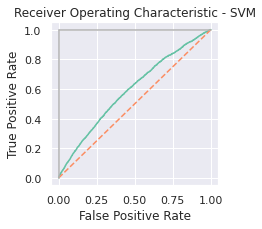

confusion matrix:
[[21587 15506]
 [ 1284  1623]]
tp: 1623, fp: 1284, tn: 21587, fn: 15506
precision: 0.094751590869286


In [54]:
roc_svm, pred_svm = evaluate(svm_tuned, X_test[:40000], y_test[:40000])

#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [55]:
def upsample(X, y):
    ###### UPSAMPLE CLASS 1 ########

    X = X.copy()
    columns = list(X.columns.values)
    X["target"] = y

    df_negative = X[X['target'] == 0]
    df_positive = X[X['target'] == 1].sample(replace=True, n=df_negative.shape[0])

    df_train = pd.concat([df_negative, df_positive])
    df_train = df_train.sample(frac=1)

    return df_train[columns], df_train['target']


In [57]:
hyperparam_grid = {
    'hidden_layer_sizes': [(100,), (100,50)],
    # 'activation': ['logistic', 'relu'],
    # 'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001]
}

# note: as previously described using the upsampled data for cross validation leads to distorted metric scores

neural_network_basic = MLPClassifier(max_iter=1000)
neural_network_tuned = GridSearchCV(neural_network_basic, param_grid=hyperparam_grid, refit=True, n_jobs=-1,
                                    scoring='roc_auc', cv=2, verbose=1)
X_train_sampled, y_train_sampled = upsample(X_train, y_train)
neural_network_tuned.fit(X_train_sampled, y_train_sampled)
print(f'Best score: {neural_network_tuned.best_score_} with param: {neural_network_tuned.best_params_}')

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best score: 0.9522075585642086 with param: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}


ROC Score is: 0.5867346251558615


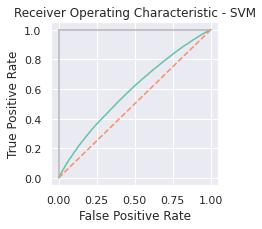

confusion matrix:
[[381366  33193]
 [ 27711   4477]]
tp: 4477, fp: 27711, tn: 381366, fn: 33193
precision: 0.11884788956729493


In [58]:
roc_mlp, pred_mlp = evaluate(neural_network_tuned, X_test, y_test)

### Additional Model: Random Forest

Testing a different approach:

ROC Score is: 0.6136041556336671


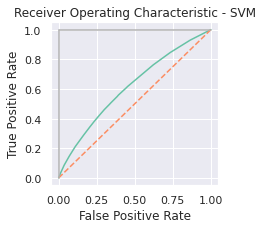

confusion matrix:
[[410445   4114]
 [ 31368    820]]
tp: 820, fp: 31368, tn: 410445, fn: 4114
precision: 0.1661937576003243


In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
roc_rf, pred_rf = evaluate(rf, X_test, y_test)

### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

               precision    recall        f1       roc
dummy           0.073283  0.072418  0.072848  0.498911
regression      0.100488  0.586958  0.171598  0.622196
svm             0.094752  0.558308  0.162008  0.593735
mlp             0.118848  0.139089  0.128174  0.586735
random forest   0.166194  0.025475  0.044179  0.613604


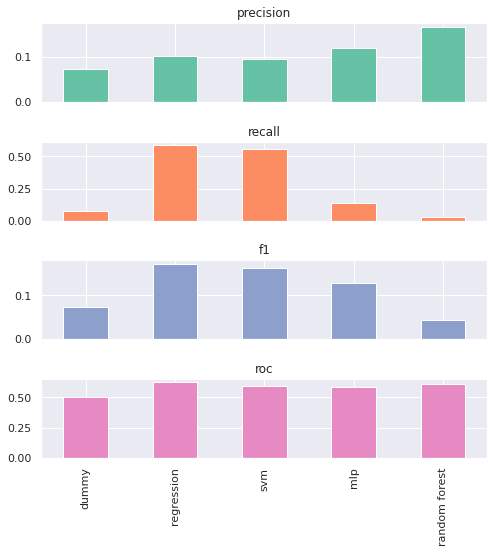

In [60]:
predictions = [pred_dummy, pred_reg, pred_svm, pred_mlp, pred_rf]
precision = [precision_score(y_test[:len(pred)], pred) for pred in predictions]
recall = [recall_score(y_test[:len(pred)], pred) for pred in predictions]
f1 = [f1_score(y_test[:len(pred)], pred) for pred in predictions]

results_df = pd.DataFrame(data={
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc": [roc_dummy, roc_reg, roc_svm, roc_mlp, roc_rf]
}, index=["dummy", "regression", "svm", "mlp", "random forest"])
print(results_df)


ax = results_df.plot(subplots=True, legend=False, figsize=(8, 8), kind="bar")
plt.subplots_adjust(hspace=0.5)



As can be seen in the above diagrams, we were not able to confidently predict future delayed flights with our selection of models, parameters and descriptive features.
We tried to counter the high imbalance of the classes in the dataset with using balanced class weights for the regression and SVM-model, and upsampling of the minority class for the MLP-model. While this prevented the models from only predicting the majority class (not delayed), the scores achieved this way are still low.
We want to find a model which can predict flights that are going to be delayed with a high precision. Following from the fact that booking a flight that later is not delayed would mean we would not be reimbursed for it. It is less important to find all flights that are delayed as long as we still find some flights that are. Thus, the recall of the models is less important.
Therefore, we focus on the precision of the models.

When comparing the precision of the models using the above diagrams, it can be seen that the random forest classifier achieves the highest precision with around 17%.
Followed by the MLP-model and the SVM-model. The worst model is the baseline dummy classifier with a precision of 0.07.
The high precision of the random forest classifier can be partly explained by the low recall. As fewer instances overall are classified as delayed the model predicts only the instances with a high probability.

Assuming we get 150 Dollar as reimbursement and our best classifier, the random forest classifier, achieves a precision of 15%.
$ x = 150\;Dollar \cdot P = 25.5\;Dollar $
Therefore, if the ticket is cheaper than 30 dollar our model is profitable.


## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [61]:
# filter dataframe by weather delay and late aircraft < 10h
no_null_data = no_null_data[(no_null_data['WEATHER_DELAY'] <= 600) & (no_null_data['LATE_AIRCRAFT_DELAY'] <= 600)]

# create new feature air time delay
no_null_data['AIR_TIME_DELAY'] = no_null_data['ELAPSED_TIME'] - no_null_data['SCHEDULED_TIME']

# copy dataset
clustering_dataset = no_null_data.copy()

print("Number of rows: " + str(clustering_dataset.shape[0]))
print("Number of columns: " + str(clustering_dataset.shape[1]))

print(clustering_dataset[['AIR_TIME_DELAY', 'ELAPSED_TIME', 'SCHEDULED_TIME']].head(10))

Number of rows: 808009
Number of columns: 37
        AIR_TIME_DELAY  ELAPSED_TIME  SCHEDULED_TIME
98452             43.0         400.0           357.0
343488            24.0         219.0           195.0
631915            -7.0          53.0            60.0
536916            18.0         171.0           153.0
387727           -33.0          57.0            90.0
268457            -1.0         229.0           230.0
348908            -5.0          80.0            85.0
264809             0.0         100.0           100.0
662082           -10.0         288.0           298.0
697585            -8.0          67.0            75.0


If the air time delay value is positive, the elapsed time is greater than the scheduled time. It means that the flight took longer than planned. The duration of the flight took longer than expected and has a delay. If the air time delay is negative, the elapsed time is less than planned. The actual air time of the flight did not take as long as expected, for example because the pilot flew faster than calculated.
    

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [62]:
from sklearn.cluster import KMeans

# initialize kmeans instance with 5 clusters
# we use the same random state so that result of clustering stays the same for different runs
kmeans = KMeans(n_clusters=5, n_init=10, init='k-means++', random_state=42)
# fit model and predict clusters
y_pred = kmeans.fit_predict(clustering_dataset[['AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY']])

In [63]:
for i in range(len(kmeans.cluster_centers_)):
    print("Centroid of Cluster " + str(i + 1) + ":")
print("AIR_TIME_DELAY = " + str(round(kmeans.cluster_centers_[i][0], 2)) + ", WEATHER_DELAY = " + str(
    round(kmeans.cluster_centers_[i][1], 2)) + ", LATE_AIRCRAFT_DELAY = " + str(
    round(kmeans.cluster_centers_[i][2], 2)))

Centroid of Cluster 1:
Centroid of Cluster 2:
Centroid of Cluster 3:
Centroid of Cluster 4:
Centroid of Cluster 5:
AIR_TIME_DELAY = 8.87, WEATHER_DELAY = 149.95, LATE_AIRCRAFT_DELAY = 8.44


In [64]:
import numpy as np

# find unique clusters and number of samples per cluster
cluster, count = np.unique(y_pred, return_counts=True)
cluster_count = dict(zip(cluster, count))
for cluster in cluster_count.keys():
    print("Cluster " + str(cluster + 1) + " contains " + str(cluster_count[cluster]) + " samples.")

Cluster 1 contains 121790 samples.
Cluster 2 contains 435647 samples.
Cluster 3 contains 26427 samples.
Cluster 4 contains 215886 samples.
Cluster 5 contains 8259 samples.


In [65]:
# add numerical cluster to dataframe
pd.options.mode.chained_assignment = None
clustering_dataset['cluster'] = y_pred

In [66]:
# map numerical cluster to categorical
cluster_mapping = {0: 'c1', 1: 'c2', 2: 'c3', 3: 'c4', 4: 'c5'}
clustering_dataset['cluster'] = clustering_dataset['cluster'].map(cluster_mapping)

The algorithm finds 5 clusters with the following sample distribution: cluster 2 is by far the largest concerning number of samples, followed by cluster 4 and 1. Cluster 3 is medium-sized and cluster 5 contains the fewest samples.
    

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

In [67]:
# extract values that are relevant for clustering
x = clustering_dataset[['AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].values

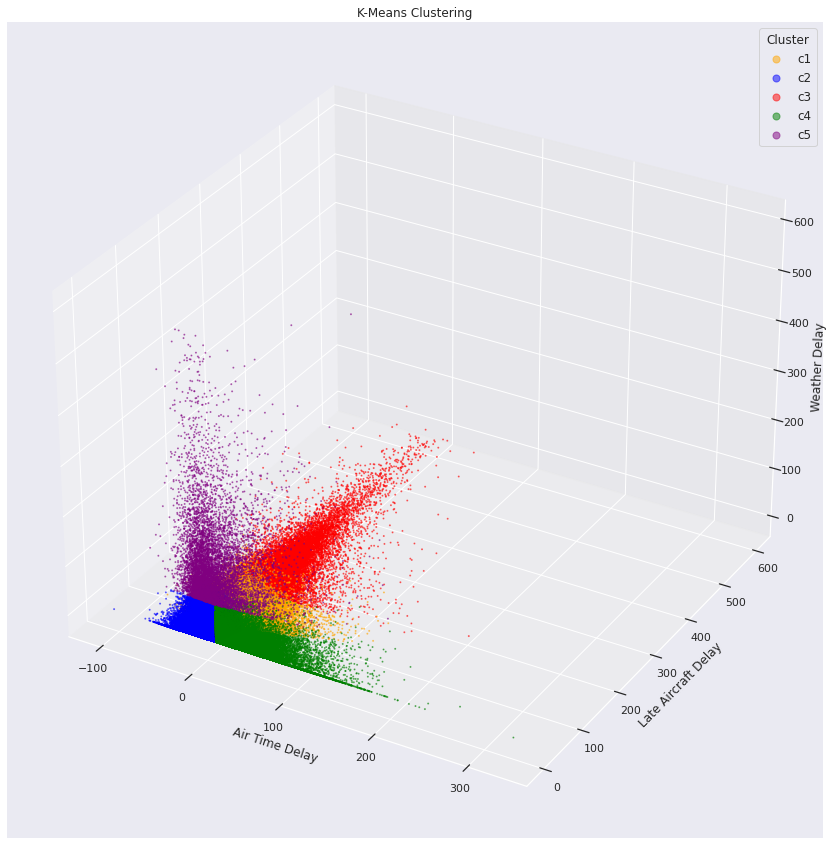

In [68]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Plot of clusters
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
# plot each cluster
ax.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], x[y_pred == 0, 2], s=1, color='orange', label="c1", alpha=0.5)
ax.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], x[y_pred == 1, 2], s=1, color='blue', label="c2", alpha=0.5)
ax.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], x[y_pred == 2, 2], s=1, color='red', label="c3", alpha=0.5)
ax.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], x[y_pred == 3, 2], s=1, color='green', label="c4", alpha=0.5)
ax.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], x[y_pred == 4, 2], s=1, color='purple', label="c5", alpha=0.5)
ax.set_xlabel('Air Time Delay')
ax.set_ylabel('Late Aircraft Delay')
ax.set_zlabel('Weather Delay')
plt.title("K-Means Clustering")
legend = ax.legend(title='Cluster', fontsize=12)
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([50])
plt.show()


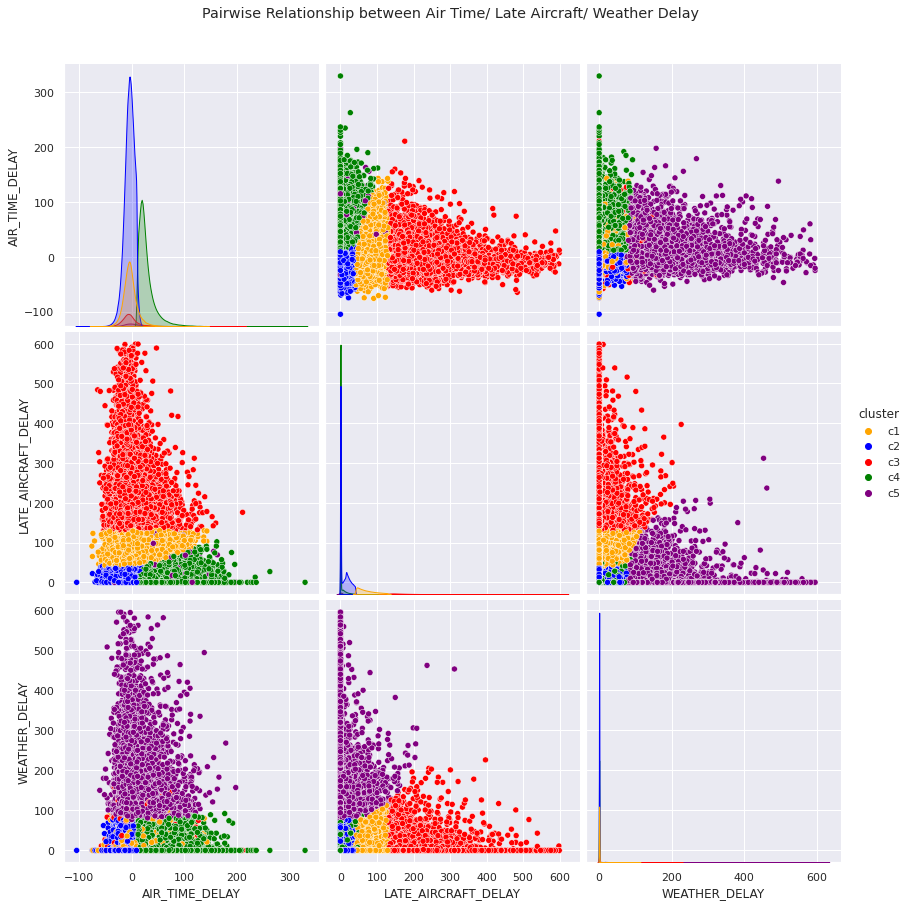

In [69]:
pairplot_df = clustering_dataset[['AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'cluster']]
# color and hue mapping for clusters
cluster_colors = {'c1': 'orange', 'c2': 'blue', 'c3': 'red', 'c4': 'green', 'c5': 'purple'}
hue_order = ['c1', 'c2', 'c3', 'c4', 'c5']
# pairplot of pairwise relationship of clustering features
pplot = sns.pairplot(data=pairplot_df, hue='cluster', palette=cluster_colors, height=4, hue_order=hue_order)
pplot.fig.suptitle("Pairwise Relationship between Air Time/ Late Aircraft/ Weather Delay", y=1.05)
plt.show()


By applying k-means, the data can be seperated into five clusters. Cluster 1,2 and 3 generally contain flights that have a negative air time delay, meaning the air time of the flight was less than planned. If there was a delay due to late aircrafts or other reasons, it was possible to compensate the delay. It can be seen that in cluster 2, the weather and late aircraft delay have the lowest value, whereas the air time delay has the largest negative value. On the other hand cluster 1 and 3 have a high delay caused by late aircrafts. Nevertheless, it was possible to make up for the delay. The weather delay value is low for all of the three clusters. 

Contrary to these three clusters, cluster 4 and 5 have a positive air time delay, the flights indeed had a longer air time than expected. Both of them have a relatively low value for the late aircraft delay. The difference between these two clusters is the weather delay, cluster 4 has a low weather delay in general, while cluster 5 contains flights with a very high weather delay. A conclusion that can be drawn is that regarding flights in cluster 4, there had to be other reasons why the flights took longer than expected. Neither weather or late aircrafts played a role. On the other side, in cluster 5 weather was an important factor why the flight was late. One can conclude that if there are bad weather conditions, it is not possible to compensate the delay by flying faster for example.

In the following, we will take a closer look at the different clusters.

In [70]:
def plot_cluster_analysis(cluster):
    cluster_flights = clustering_dataset[clustering_dataset['cluster'] == cluster]

    color = cluster_colors[cluster]

    origin_airports = cluster_flights['ORIGIN_AIRPORT'].value_counts()
    destination_airports = cluster_flights['DESTINATION_AIRPORT'].value_counts()
    daytime = cluster_flights['SCHEDULED_DEPARTURE_CATEGORY'].value_counts(normalize=True)

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Cluster ' + cluster, fontsize=16)

    # barplot mean delay for different delay reasons
    axs[0, 0].barh(y=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
                   width=cluster_flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                                          'WEATHER_DELAY']].mean(), color=color)
    axs[0, 0].set_title("Average Delay in Minutes")
    axs[0, 0].set_ylabel("Delay Reason")
    axs[0, 0].set_xlabel("Minutes")

    # pie chart for scheduled departure delay
    percentages = [i * 100 for i in np.array(daytime)]
    cmap = plt.get_cmap("Pastel1")
    colors = cmap(np.array([1, 2, 3, 4]))
    axs[0, 1].pie(percentages, labels=daytime.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
    axs[0, 1].set_title("Scheduled Departure Category")

    # barplot for number of flights per airport
    axs[1, 0].bar(x=origin_airports.head(10).index, height=origin_airports.head(10), color=color)
    axs[1, 1].bar(x=destination_airports.head(10).index, height=destination_airports.head(10), color=color)
    axs[1, 0].set_title("Origin Airport")
    axs[1, 0].set_ylabel("Number of Flights")
    axs[1, 1].set_title("Destination Airport")

    # set y-axis limit for plots in second row
    if origin_airports.max() > destination_airports.max():
        max_ylim = origin_airports.max()
    else:
        max_ylim = destination_airports.max()
    plt.gcf().get_axes()[2].set_ylim(0, max_ylim * 1.1)
    plt.gcf().get_axes()[3].set_ylim(0, max_ylim * 1.1)

    plt.show()

    # print delay stats
    print('Number of flights in Cluster ' + cluster + ': ' + str(len(cluster_flights)))
    print('Mean arrival delay: ' + str(np.round(cluster_flights['ARRIVAL_DELAY'].mean(), 2)) + ' Minutes')
    print('Mean air time delay: ' + str(np.round(cluster_flights['AIR_TIME_DELAY'].mean(), 2)) + ' Minutes')

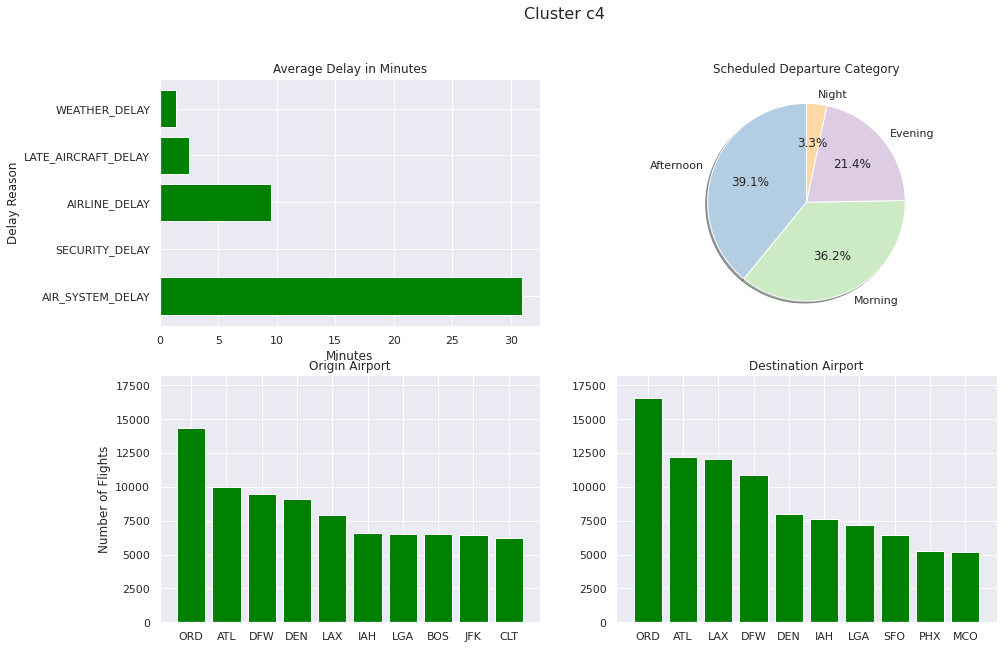

Number of flights in Cluster c4: 215886
Mean arrival delay: 44.41 Minutes
Mean air time delay: 27.23 Minutes


In [71]:
plot_cluster_analysis('c4')

As shown in the figure above, cluster 4 indeed has other reasons why there is an air time delay. The main reason is air system delay, which on average leads to a delay of roughly 30 minutes. It can be derived that it is not possible to compensate a delay caused by problems with the air system as the air time delay of instances in cluster 4 is mostly positive. This makes sense in the way that if there is a lot of air traffic and the flight is delayed because of that, the pilot has no chance to compensate the delay by flying faster. 

Besides, the plots show that flights in cluster 4 mostly depart and arrive at airport "ORD" and 60% of the flights take place in the afternoon or evening. The overall arrival delay is approximately 45 minutes which is relatively low.

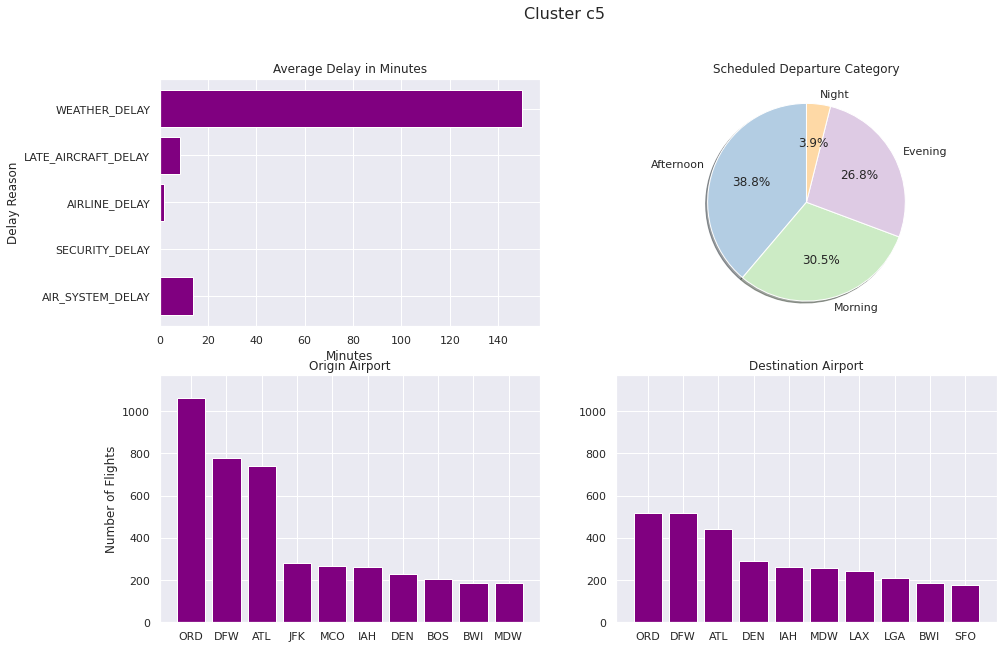

Number of flights in Cluster c5: 8259
Mean arrival delay: 173.78 Minutes
Mean air time delay: 8.86 Minutes


In [72]:
plot_cluster_analysis('c5')

Flights in cluster 5 are most often delayed because of weather conditions. The mean weather delay is more than 140 minutes and the mean arrival delay averages out on roughly 174 minutes. We can see that it was not possible to compensate the weather delay. The distribution of the scheduled departure category is quite similary to cluster 4. Again, the main origin and destination airport is "ORD". But in cluster 5, roughly the same number of flights have the destination "DFW".

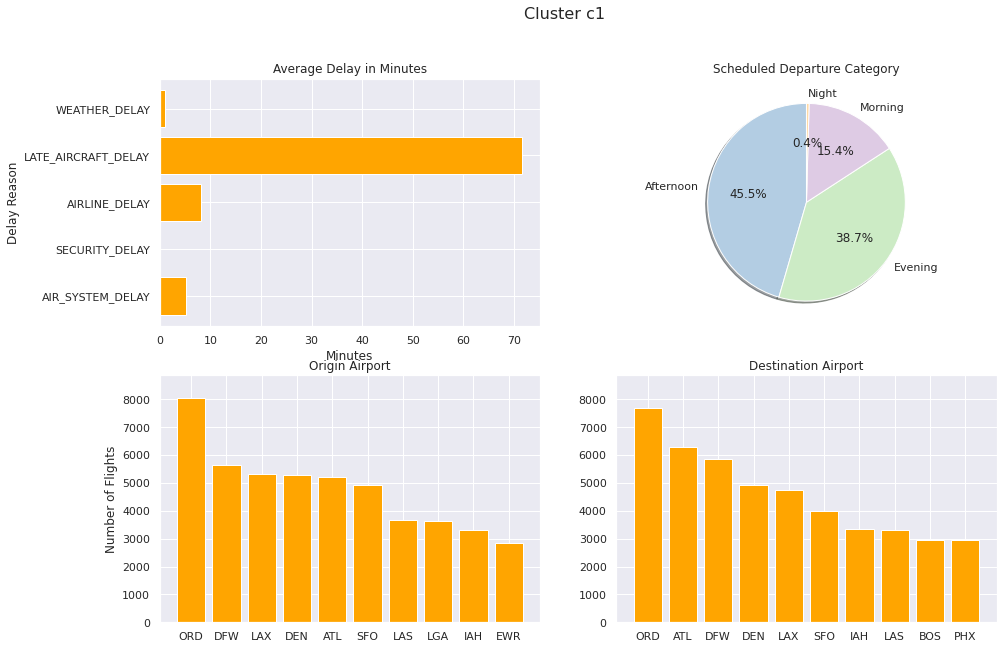

Number of flights in Cluster c1: 121790
Mean arrival delay: 86.22 Minutes
Mean air time delay: -3.37 Minutes


In [73]:
plot_cluster_analysis('c1')

If we compare cluster 1 to cluster 4 and 5, one difference we can observe is that flights in cluster 1 are more often scheduled in the afternoon and evening (84%) and more infrequently in the morning and night. Moreover, the main reason for delay of flights in cluster 1 is late aircraft. Even though the air time delay is negative (delay can be compensated), the mean arrival delay is twice as high as in cluster 4. This is explained by the fact that the value of late aircraft delay is also twice as high as the air system delay in cluster 4. Flights in cluster 1 mostly depart from and arrive at airport "ORD". 

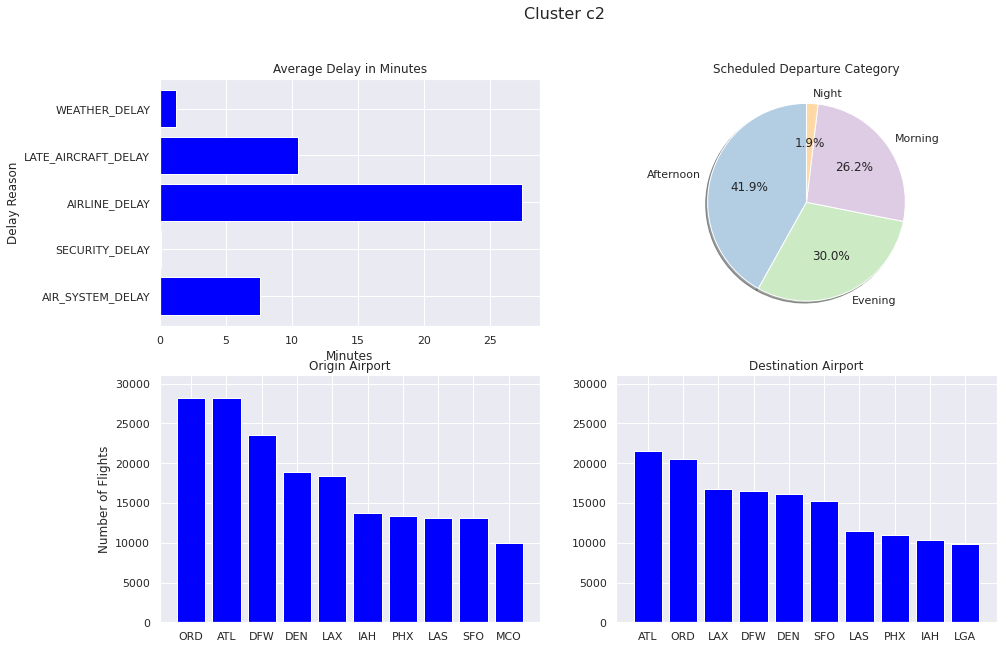

Number of flights in Cluster c2: 435647
Mean arrival delay: 46.77 Minutes
Mean air time delay: -5.11 Minutes


In [74]:
plot_cluster_analysis('c2')

Compared to the other clusters, in cluster 2 the main reason for delay is caused by the operating airlines. The mean airline delay is about 27 minutes and the late aircraft delay is 10 minutes. It is possible to compensate this delay during the air time, as the delay happened before or after the flight. Similarly to cluster 4, the flights are mostly scheduled in the afternoon and evening (72%). Here, "ATL" is the main destination airport and second most frequent origin airport. The mean arrival delay is relatively low.

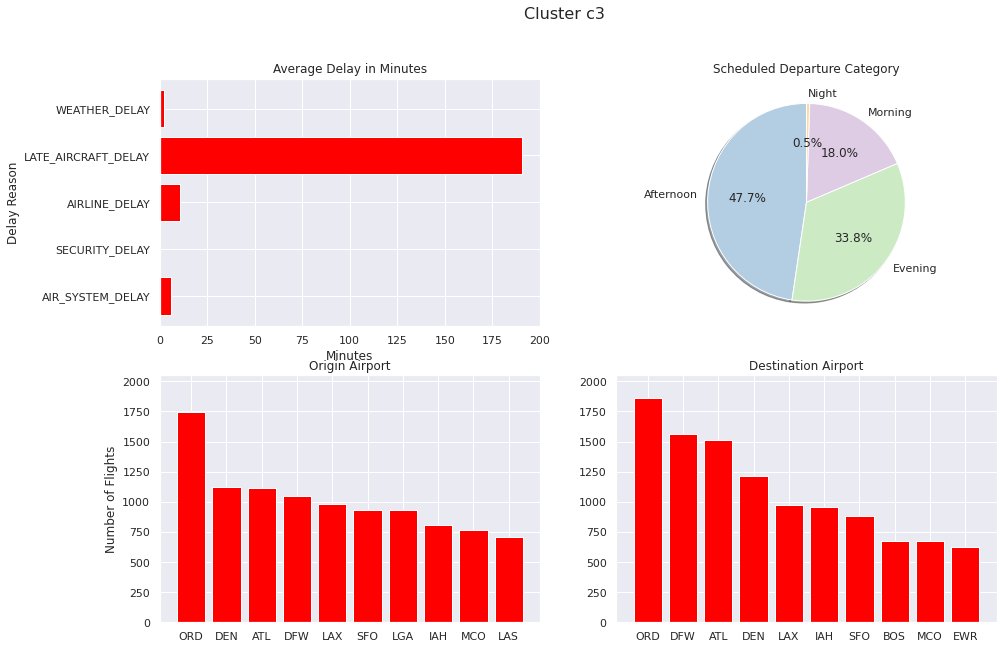

Number of flights in Cluster c3: 26427
Mean arrival delay: 209.74 Minutes
Mean air time delay: -4.18 Minutes


In [75]:
plot_cluster_analysis('c3')

Strikingly, in cluster 3 the mean arrival delay is extremely high: around 210 minutes. This is mainly caused by late aircraft delay which averages out on almost 200 minutes. We can compare cluster 3 to cluster 1 concerning the main delay reason and air time delay but the level of late aircraft delay is much higher in cluster 3. Apart from that, flights in cluster 3 are equally scheduled in the afternoon and evening (80%) and the main origin and destination airport likewise is "ORD".